### Perform Tips Analysis

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### step 1: Ingest & initial validation

In [67]:
raw_data_path="data/raw/tips.csv"

df=pd.read_csv(raw_data_path)

In [4]:
df.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.shape

(244, 7)

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [19]:
df['tip'].value_counts()

tip
2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: count, Length: 123, dtype: int64

In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Step 2: Data quality profiling

In [50]:
# quick column profile
profile = []
for c in df.columns:
    profile.append({
      'col': c,
      'dtype': df[c].dtype,
      'n_missing': df[c].isna().sum(),
      'pct_missing': df[c].isna().mean()*100,
      'n_unique': df[c].nunique(dropna=False),
      'top': df[c].value_counts(dropna=False).index[:3].tolist(),
      'min':df[c].min(),
      'max':df[c].max()
    })
pd.DataFrame(profile).sort_values('pct_missing', ascending=False)

,col,dtype,n_missing,pct_missing,n_unique,top,min,max
0,total_bill,float64,0,0.0,229,"[13.42, 13.81, 15.98]",3.07,50.81
1,tip,float64,0,0.0,123,"[2.0, 3.0, 4.0]",1.0,10.0
2,sex,object,0,0.0,2,"[Male, Female]",Female,Male
3,smoker,object,0,0.0,2,"[No, Yes]",No,Yes
4,day,object,0,0.0,4,"[Sat, Sun, Thur]",Fri,Thur
5,time,object,0,0.0,2,"[Dinner, Lunch]",Dinner,Lunch
6,size,int64,0,0.0,6,"[2, 3, 4]",1,6


#### Step 3: Univariate Analysis

In [11]:
num_cols=df.select_dtypes(include='number').columns.tolist()
num_cols

['total_bill', 'tip', 'size']

In [12]:
categorical_cols=df.select_dtypes(include=['object','category']).columns.to_list()
categorical_cols

['sex', 'smoker', 'day', 'time']

In [13]:
df[num_cols].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [14]:
df[num_cols].corr()['tip']

total_bill    0.675734
tip           1.000000
size          0.489299
Name: tip, dtype: float64

##### For numerical columns

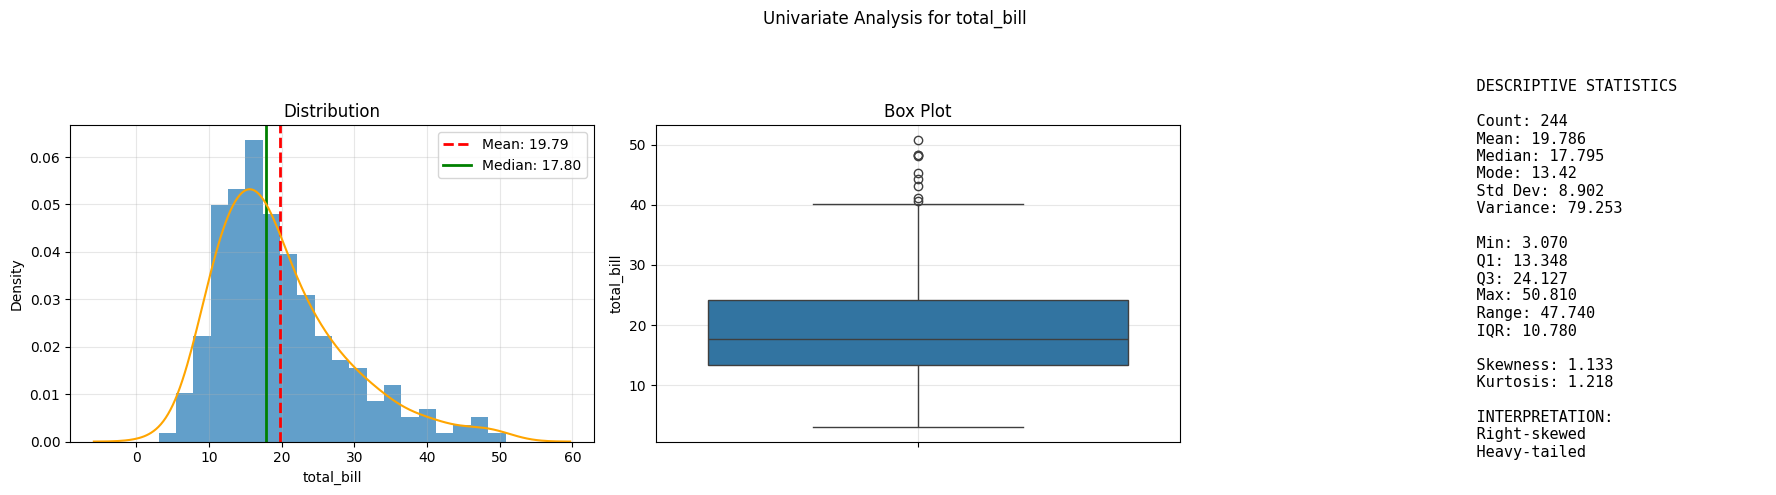

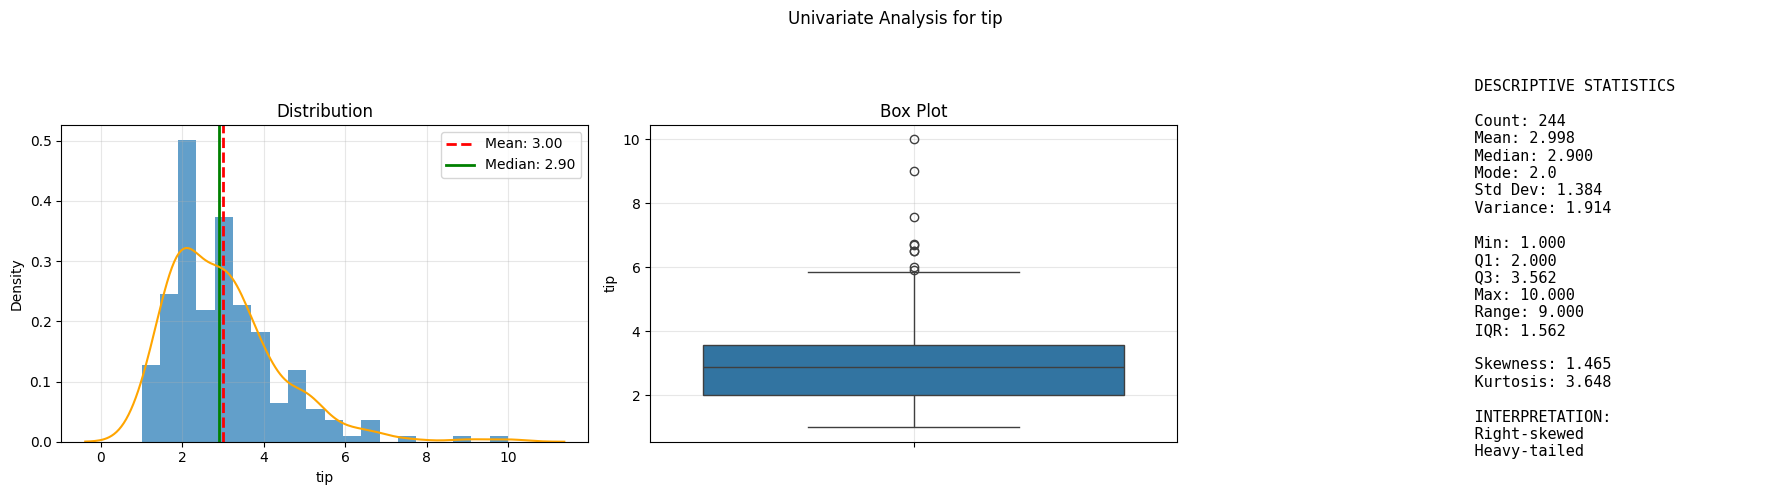

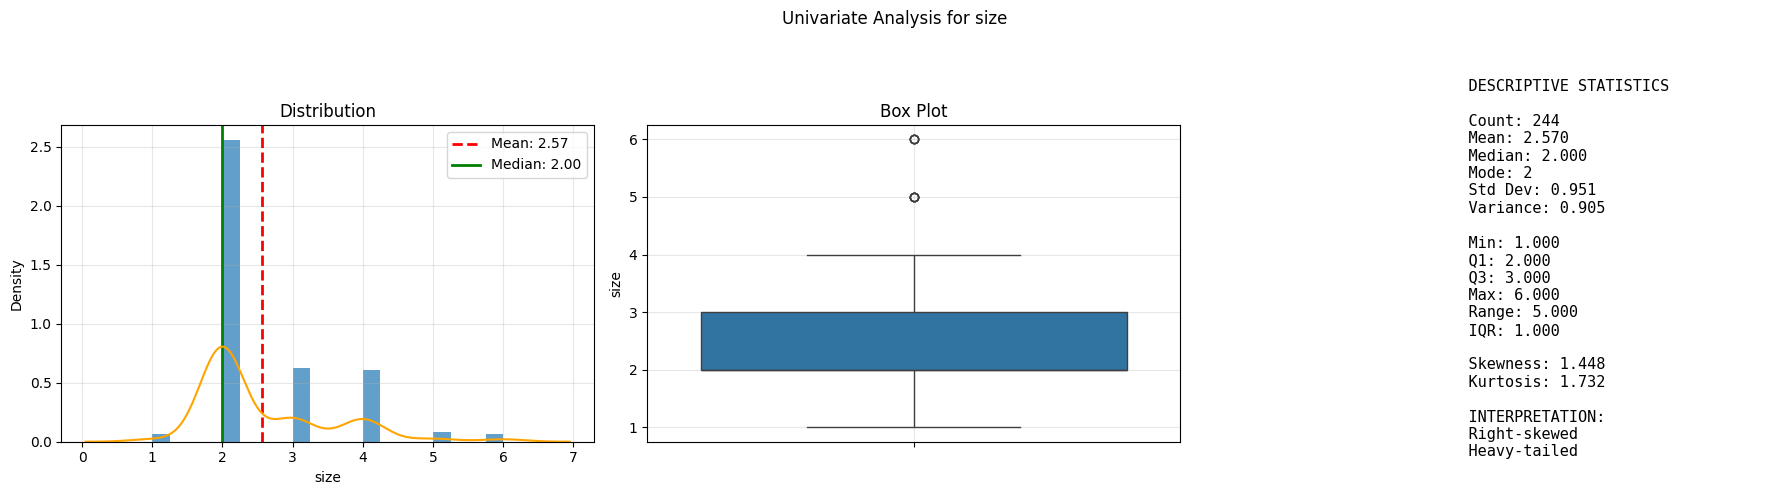

In [15]:
def UAT_numeric(cols):

    for col in cols:
        stats = {
            'count': df[col].count(),
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode().iloc[0] if not df[col].mode().empty else "No unique mode",
            'std': df[col].std(),
            'min': df[col].min(),
            'max': df[col].max(),
            'range': df[col].max() - df[col].min(),
            'q1': df[col].quantile(0.25),
            'q3': df[col].quantile(0.75),
            'iqr': df[col].quantile(0.75) - df[col].quantile(0.25),
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurtosis()
        }
        fig,axes=plt.subplots(1,3,figsize=(18,5))
        fig.suptitle(f"Univariate Analysis for {col}")

        axes[0].hist(df[col].dropna(),bins=20,density=True, alpha=0.7)
        axes[0].axvline(stats['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {stats['mean']:.2f}")
        axes[0].axvline(stats['median'], color='green', linestyle='-', linewidth=2, label=f"Median: {stats['median']:.2f}")
        sns.kdeplot(df[col].dropna(), ax=axes[0], color='orange')
        axes[0].set_title('Distribution')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Density')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)


        sns.boxplot(y=df[col], ax=axes[1])
        axes[1].set_title('Box Plot')
        axes[1].grid(True, alpha=0.3)

        # Statistics text
        axes[2].axis('off')
        stats_text = f"""
                    DESCRIPTIVE STATISTICS

                    Count: {stats['count']}
                    Mean: {stats['mean']:.3f}
                    Median: {stats['median']:.3f}
                    Mode: {stats['mode']}
                    Std Dev: {stats['std']:.3f}
                    Variance: {stats['std']**2:.3f}

                    Min: {stats['min']:.3f}
                    Q1: {stats['q1']:.3f}
                    Q3: {stats['q3']:.3f}
                    Max: {stats['max']:.3f}
                    Range: {stats['range']:.3f}
                    IQR: {stats['iqr']:.3f}

                    Skewness: {stats['skewness']:.3f}
                    Kurtosis: {stats['kurtosis']:.3f}

                    INTERPRETATION:
                    {'Right-skewed' if stats['skewness'] > 0.5 else 'Left-skewed' if stats['skewness'] < -0.5 else 'Symmetric'}
                    {'Heavy-tailed' if stats['kurtosis'] > 1 else 'Light-tailed' if stats['kurtosis'] < -1 else 'Normal tails'}
                """
        
        axes[2].text(0.1, 1.2, stats_text, transform=axes[2].transAxes, 
                    fontsize=11, verticalalignment='top', fontfamily='monospace')
        
        plt.tight_layout()
        plt.show()

UAT_numeric(num_cols)

#### Findings

### Image 1: Total Bill Analysis
Key Findings:

 - Mean ($19.79) > Median ($17.80) → Right-skewed distribution (tail extends to the right)
 - Range: Bills range from $3.07 to $50.81 (huge variation!)
 - Most common bills: $15-25 range (where the histogram peaks)
 - Outliers: Several high bills ($40-50) visible in the box plot

What This Means:

 - Most customers have moderate bills ($13-24 based on IQR)
 - A few high spenders pull the average up
 - The restaurant serves mostly average diners with occasional big spenders
 - Skewness (1.133) confirms right skew - a few expensive orders
 - Heavy tails suggest some extreme values exist

### Image 2: Tip Amount Analysis
Key Findings:

 - Mean ($3.00) ≈ Median ($2.90) → Fairly symmetric, slight right skew
 - Mode: $2.00 (most common tip amount)
 - Range: $1 to $10 (one person tipped $10!)
 - Most tips: $2-3.50 range (the IQR)

What This Means:

 - Tips cluster around $2-3 for most transactions
 - More extreme right skew than total_bill (skewness: 1.465)
 - Very heavy tails (kurtosis: 3.648) → some extremely generous tippers!
 - The outliers at $6-10 are people tipping WAY above average
 - This suggests tip amount might not just depend on bill size - maybe generosity varies a lot

### Image 3: Party Size Analysis
Key Findings:

 - Median = 2, Mean = 2.57 → Most parties are 2 people (couples/pairs)
 - Mode = 2 (confirms it)
 - Range: 1-6 people
 - Right-skewed (1.448) → occasional large groups

What This Means:

 - This is a couple-friendly restaurant (median of 2)
 - Large parties (5-6 people) are rare but exist
 - The distribution is discrete (you can't have 2.5 people!)
 - Most business comes from pairs and small groups (2-3 people)

### Key observations:

- "The dataset represents a casual dining restaurant with average bills around $18-20"
- "Most customers are pairs (2 people), typical of date nights or lunch meetings"
- "While bills follow a typical pattern, tip amounts show high variability - some customers are exceptionally generous"
- "Heavy tails in both bills and tips suggest a few customers behave very differently from the norm"

##### For categorical columns

In [16]:
cat_cols=df.columns[~df.columns.isin(num_cols)]
print(cat_cols)

Index(['sex', 'smoker', 'day', 'time'], dtype='object')


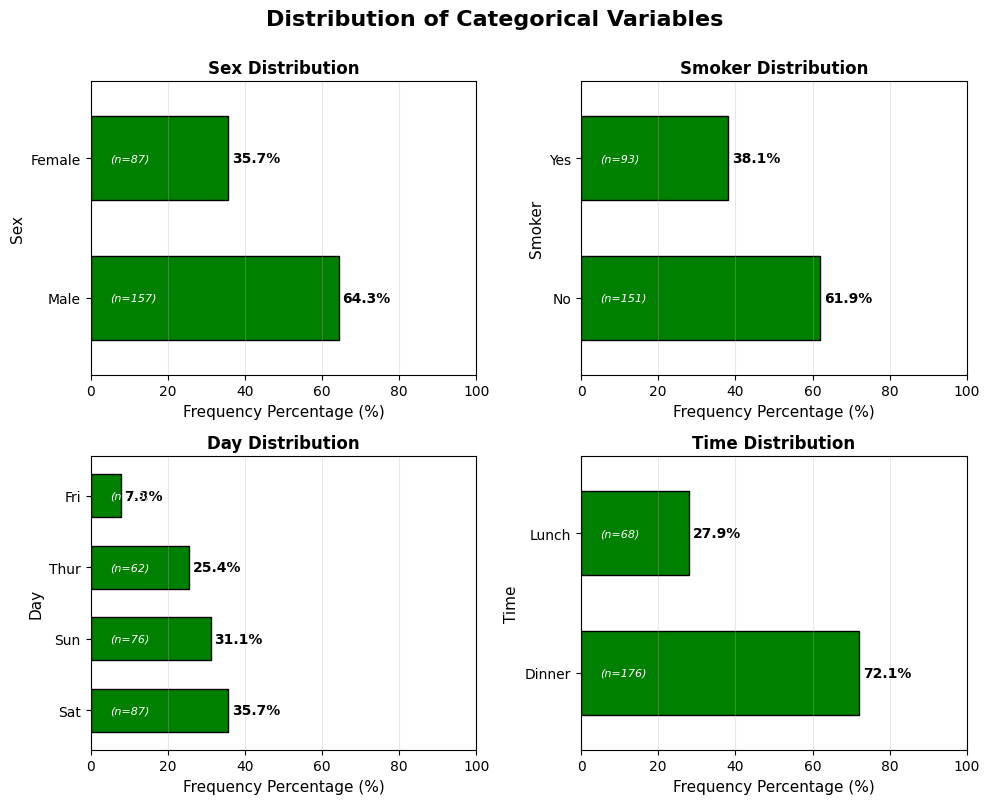


CATEGORICAL VARIABLES SUMMARY

📊 SEX:
----------------------------------------
  Male           : 157 ( 64.3%)
  Female         :  87 ( 35.7%)
  Total          : 244 (100.0%)

📊 SMOKER:
----------------------------------------
  No             : 151 ( 61.9%)
  Yes            :  93 ( 38.1%)
  Total          : 244 (100.0%)

📊 DAY:
----------------------------------------
  Sat            :  87 ( 35.7%)
  Sun            :  76 ( 31.1%)
  Thur           :  62 ( 25.4%)
  Fri            :  19 (  7.8%)
  Total          : 244 (100.0%)

📊 TIME:
----------------------------------------
  Dinner         : 176 ( 72.1%)
  Lunch          :  68 ( 27.9%)
  Total          : 244 (100.0%)



In [17]:
import math

def UVA_categorical(df, columns):
    max_cols_per_row = 2
    size = len(columns)
    rows = math.ceil(size / max_cols_per_row)
    
    fig_width = 5 * max_cols_per_row
    fig_height = 4 * rows
    
    fig, ax = plt.subplots(nrows=rows, ncols=max_cols_per_row, figsize=(fig_width, fig_height))
    
    # Handle single row case (ax is 1D array, not 2D)
    if rows == 1:
        ax = ax.reshape(1, -1)
    
    for i, col in enumerate(columns):
        row = i // max_cols_per_row
        col_idx = i % max_cols_per_row
        
        # Calculate frequency percentages
        value_counts = df[col].value_counts(normalize=True).mul(100).sort_values(ascending=False)
        
        # Plot bar chart
        bars = value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.6, color='green', edgecolor='black')
        
        # Add frequency percentages to the bars
        for index, value in enumerate(value_counts):
            ax[row, col_idx].text(value + 1, index, f'{value:.1f}%', 
                                  fontsize=10, weight='bold', va='center')
        
        # Formatting
        ax[row, col_idx].set_xlim([0, 100])
        ax[row, col_idx].set_xlabel('Frequency Percentage (%)', fontsize=11)
        ax[row, col_idx].set_ylabel(col.capitalize(), fontsize=11)
        ax[row, col_idx].set_title(f'{col.capitalize()} Distribution', fontsize=12, fontweight='bold')
        ax[row, col_idx].grid(axis='x', alpha=0.3)
        
        # Add count annotations
        counts = df[col].value_counts().sort_values(ascending=False)
        for index, (category, count) in enumerate(counts.items()):
            ax[row, col_idx].text(5, index, f'(n={count})', 
                                  fontsize=8, style='italic', va='center', color='white')
    
    # Hide empty subplots if odd number of columns
    if size % max_cols_per_row != 0:
        for j in range(size % max_cols_per_row, max_cols_per_row):
            fig.delaxes(ax[rows-1, j])
    
    plt.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*60)
    print("CATEGORICAL VARIABLES SUMMARY")
    print("="*60)
    for col in columns:
        print(f"\n📊 {col.upper()}:")
        print("-" * 40)
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True).mul(100)
        for category in counts.index:
            print(f"  {category:15s}: {counts[category]:3d} ({percentages[category]:5.1f}%)")
        print(f"  {'Total':15s}: {counts.sum():3d} (100.0%)")
    print("\n" + "="*60)

# Run the analysis
UVA_categorical(df, cat_cols)

### Interpretations

---

#### 1. 🧍 Sex Distribution

**64.3% Male, 35.7% Female**  
**Correct:** Males pay the bill more often  
**Insight:** This might reflect traditional gender norms where men pay bills, OR it could mean the restaurant attracts more male customers.  
**Question for later:** _Do males and females tip differently?_

---

#### 2. 🚬 Smoker Distribution

**61.9% Non-smokers, 38.1% Smokers**  
**Correct:** Non-smokers are **more common**, not smokers!  
**Insight:** Almost 40% are smokers — this is **high** (US average ≈ 15%).  
This data might be older, or the restaurant could have a smoking section that attracts smokers.  
**Question for later:** _Do smokers tip differently?_ (Maybe they stay longer or order more drinks?)

---

#### 3. 📅 Day Distribution

**Saturday (35.7%) > Sunday (31.1%) > Thursday (25.4%) > Friday (7.8%)**  
**Correct:** Weekend dominance  
**Surprising finding:** Why is **Friday so low**? Friday should usually be busy!  

**Possible reasons:**  
- Data collection issue  
- Restaurant not in a business district  

**Insight:** This is clearly a **weekend/leisure restaurant**, not a weekday business lunch spot.  
**Question for later:** _Do weekend tippers behave differently than weekday tippers?_

---

#### 4. 🍽️ Time Distribution

**Dinner (72.1%) >> Lunch (27.9%)**  
**Correct:** Dinner-dominant restaurant  
**Insight:** This is primarily an **evening dining establishment**.  
Bills are likely higher at dinner (people order appetizers, drinks, desserts).  
**Question for later:** _Is tipping behavior different at lunch vs dinner?_

---

#### Deeper Insights — Connecting the Dots

### 🍴 Restaurant Profile

Based on the categorical analysis, this restaurant is:

- **Weekend-focused:** 66.8% of visits are Sat/Sun  
- **Dinner-oriented:** 72.1% dinner traffic  
- **Male bill-payers dominant:** 64.3%  
- **Moderate smoking clientele:** 38.1%

---

#### Interpretation

This suggests a **casual evening/weekend restaurant**, possibly with a **bar component** (explaining the smoker percentage).  

Think of places like:
> _Applebee’s, Chili’s, or local bistros — casual dining with weekend social vibes._

---


## Key Questions to Explore in Bivariate Analysis

Now that each variable has been understood individually, the next step is to explore the **relationships** between variables.

### Questions to Investigate

1. **Do males tip more or less than females?**  
   *(sex vs tip_percentage)*

2. **Do smokers tip differently than non-smokers?**  
   *(smoker vs tip_percentage)*

3. **Which day receives the best tips?**  
   *(day vs tip_percentage)*

4. **Is tipping behavior different at dinner compared to lunch?**  
   *(time vs tip_percentage)*

5. **Do larger parties tip less per person?**  
   *(size vs tip_percentage)*

6. **Does the bill size affect the tip percentage?**  
   *(total_bill vs tip_percentage)*


### Bivariate Analysis

##### numeric vs numeric

PART 1: NUMERIC vs NUMERIC RELATIONSHIPS
✅ Saved: numeric_vs_numeric_scatter.png


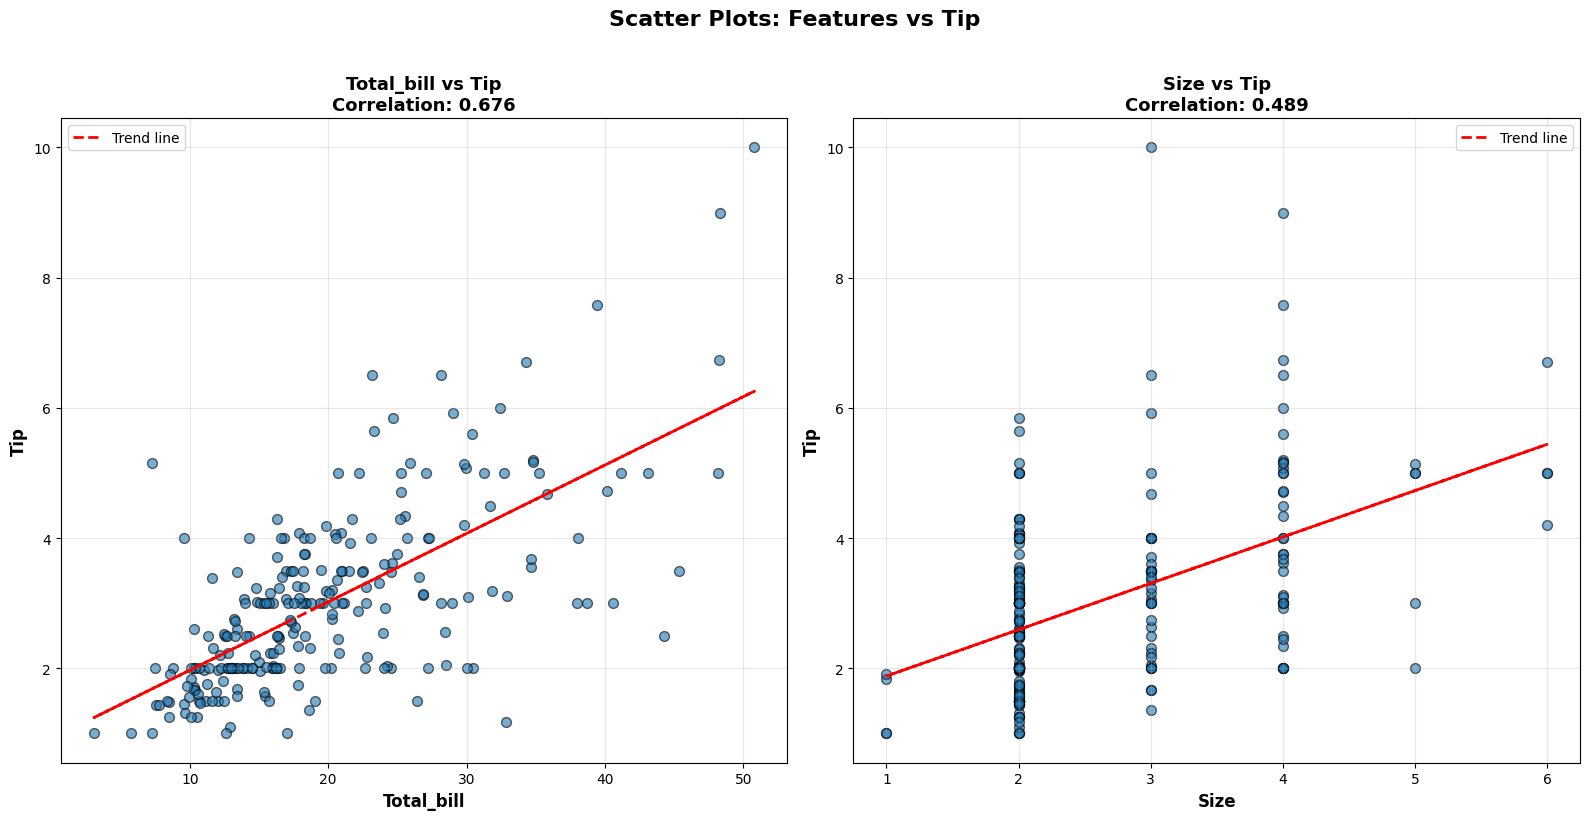


CORRELATION MATRIX
✅ Saved: correlation_matrix.png


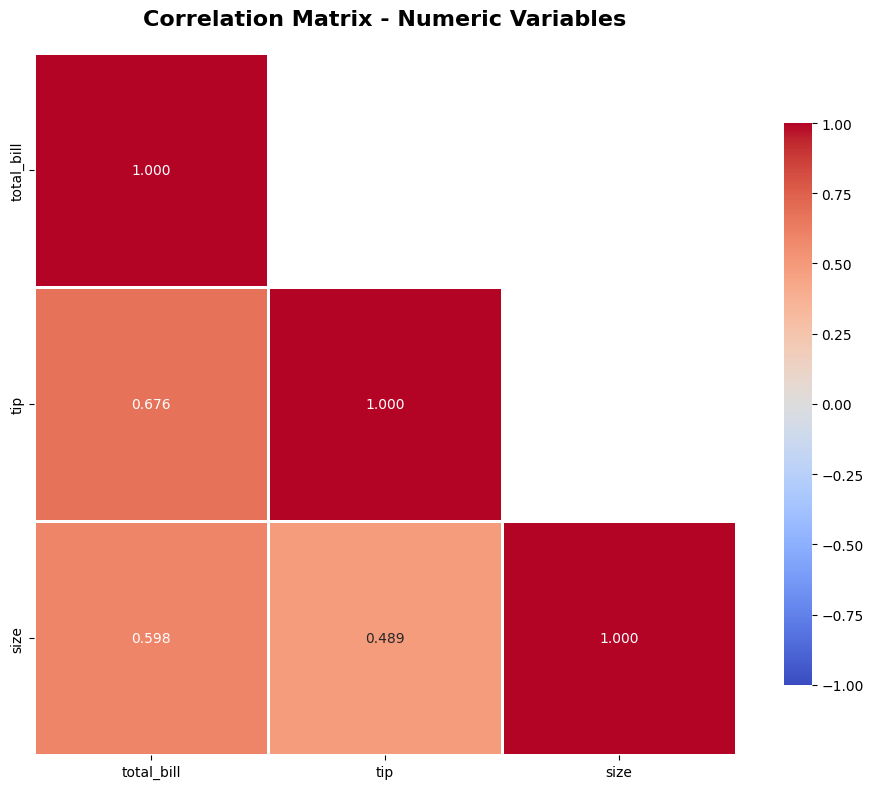


📊 CORRELATION INSIGHTS:
----------------------------------------------------------------------

Correlations with TIP:
  total_bill          :  0.676  [Moderate positive]
  size                :  0.489  [Moderate positive]

⚠️  MULTICOLLINEARITY CHECK (Feature vs Feature):
----------------------------------------------------------------------
  ✅ No multicollinearity detected (all correlations < 0.7)


In [18]:
def numeric_vs_numeric(df, num_cols, target='tip'):
    """
    Analyze relationships between numeric variables
    Creates scatter plots and correlation analysis
    """
    print("="*70)
    print("PART 1: NUMERIC vs NUMERIC RELATIONSHIPS")
    print("="*70)
    
    # Remove target from num_cols if present
    feature_cols = [col for col in num_cols if col != target]
    
    # 1. Scatter plots with regression lines
    n_features = len(feature_cols)
    # Calculate grid dimensions: n_rows x 2 columns
    n_rows = (n_features + 1) // 2  

    fig, axes = plt.subplots(n_rows, 2, figsize=(8*n_features,8))

    if n_features == 1:  #didn't understand this one
        axes = [axes]
    for i, col in enumerate(feature_cols):
        # Scatter plot
        axes[i].scatter(df[col], df[target], alpha=0.6, s=50, edgecolor='black')
        
        # Add regression line
        z = np.polyfit(df[col], df[target],1)  #1 is degree 
        p = np.poly1d(z)
        axes[i].plot(df[col], p(df[col]), "r--", linewidth=2, label=f'Trend line')
        
        # Calculate correlation
        corr = df[col].corr(df[target])
        
        # Formatting
        axes[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold')
        axes[i].set_ylabel(target.capitalize(), fontsize=12, fontweight='bold')
        axes[i].set_title(f'{col.capitalize()} vs {target.capitalize()}\nCorrelation: {corr:.3f}', 
                         fontsize=13, fontweight='bold')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.suptitle(f'Scatter Plots: Features vs {target.capitalize()}', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('numeric_vs_numeric_scatter.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: numeric_vs_numeric_scatter.png")
    plt.show()
        
    # 2. Correlation Matrix
    print("\n" + "="*70)
    print("CORRELATION MATRIX")
    print("="*70)
    
    corr_matrix = df[num_cols].corr()
    
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
                mask=mask, vmin=-1, vmax=1)
    plt.title('Correlation Matrix - Numeric Variables', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: correlation_matrix.png")
    plt.show()


    # 3. Print correlation insights
    print("\n📊 CORRELATION INSIGHTS:")
    print("-" * 70)
    
    # Get correlations with target
    target_corrs = corr_matrix[target].drop(target).sort_values(ascending=False)
    
    print(f"\nCorrelations with {target.upper()}:")
    for feature, corr_value in target_corrs.items():
        strength = "Strong" if abs(corr_value) > 0.7 else "Moderate" if abs(corr_value) > 0.4 else "Weak"
        direction = "positive" if corr_value > 0 else "negative"
        print(f"  {feature:20s}: {corr_value:6.3f}  [{strength} {direction}]")
    
    # Check for multicollinearity (high correlation between features)
    print("\n⚠️  MULTICOLLINEARITY CHECK (Feature vs Feature):")
    print("-" * 70)
    found_multicol = False
    for i in range(len(num_cols)):
        for j in range(i+1, len(num_cols)):
            if num_cols[i] != target and num_cols[j] != target:
                corr_val = corr_matrix.loc[num_cols[i], num_cols[j]]
                if abs(corr_val) > 0.7:
                    print(f"  ⚠️  {num_cols[i]} ↔ {num_cols[j]}: {corr_val:.3f} (High correlation!)")
                    found_multicol = True
    
    if not found_multicol:
        print("  ✅ No multicollinearity detected (all correlations < 0.7)")



numeric_vs_numeric(df,num_cols)

### Key Findings from Scatter Plots & Correlation Matrix

### 1. **Total Bill vs Tip Relationship**
- **Correlation:** `0.676` → *Strong positive relationship*  
- **Interpretation:** As the total bill increases, tips generally increase.  
- **Insight:** This is your strongest predictor of tip amount.

---

### 2. **Party Size vs Tip Relationship**
- **Correlation:** `0.489` → *Moderate positive relationship*  
- **Interpretation:** Larger parties tend to give higher tips.  
- **Insight:** The relationship is meaningful but weaker than total bill.

---

### 3. **Total Bill vs Party Size Relationship**
- **Correlation:** `0.598` → *Moderate-strong positive relationship*  
- **Interpretation:** Larger parties tend to have higher bills — which makes sense!

---

## Business Insights

### **Primary Driver of Tips**
- Total bill amount is the biggest factor influencing tips.  
- For every **$10 increase in bill**, tips increase by approximately **$X** (check your trend line slope).

### **Secondary Factor**
- Party size also influences tips, but less strongly.  
- Larger groups tip more — possibly because they spend more.

---

## Potential Actionable Insights

1. **Focus on Upselling:**  
   Higher bills → Higher tips.

2. **Large Party Strategy:**  
   Provide excellent service to large groups.

3. **Server Training:**  
   Emphasize the connection between bill size and tip size.

---

## ⚠️ Important Considerations

### **Multicollinearity Alert**
- Total bill and party size are correlated (`0.598`).  
- They provide overlapping information about tips.  
- In predictive modeling, you might not need both variables.

### **Unexplained Variance**
- Even the strongest correlation (`0.676`) explains only about **46% of variance** (`0.676² = 0.457`).  
- Therefore, **other factors** beyond bill size and party size influence tips.

---

## Next Questions to Explore

1. **What explains the remaining 54% of tip variation?**  
   - Time of day? Day of week? Server performance? Customer demographics?

2. **Is the tip percentage consistent?**  
   - Do people tip a fixed percentage, or does it vary?

3. **Interaction Effects:**  
   - Do large parties with small bills tip differently than small parties with large bills?

---

## **Summary Interpretation**

> **"Total bill amount is the strongest predictor of tips, with party size being a secondary factor.  
However, over half of what determines tip amounts remains unexplained by these two variables alone."**


#### Categorical vs Numerical


PART 2: CATEGORICAL vs NUMERIC RELATIONSHIPS


/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1046/1368671338.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, ax=axes[i], palette='Set2')
/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1046/1368671338.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, ax=axes[i], palette='Set2')
/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1046/1368671338.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, ax=axes[i], palette='Set2')
/

Saved: categorical_vs_numeric_boxplots.png


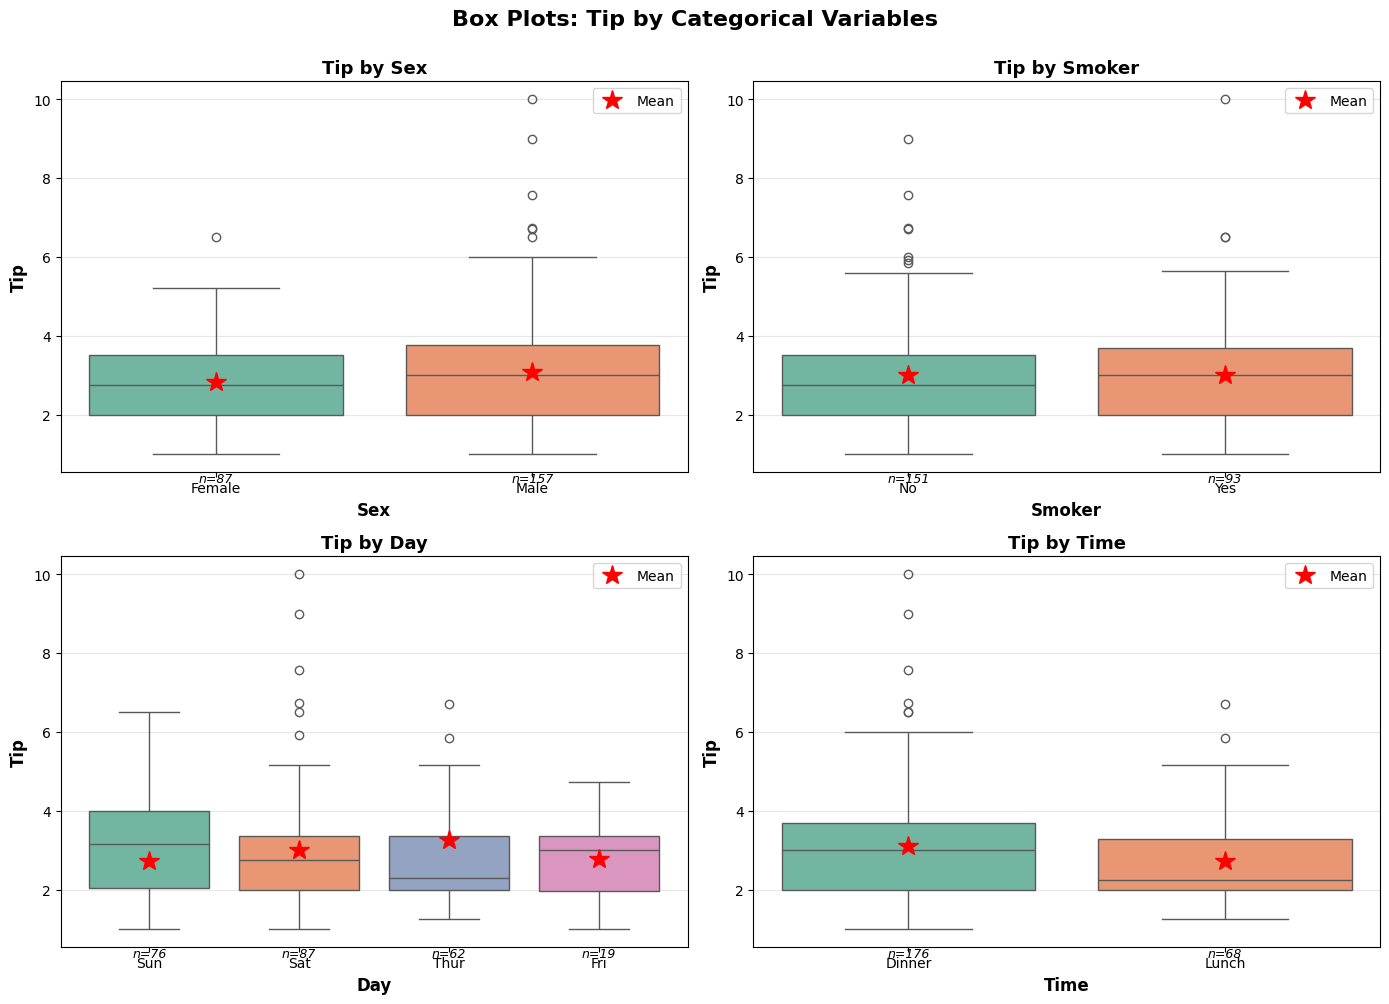


STATISTICAL SIGNIFICANCE TESTS

Testing if group differences are statistically significant...
(p-value < 0.05 means the difference is significant)


SEX:
----------------------------------------------------------------------

Group Statistics:
        count      mean       std  min   max
sex                                         
Female     87  2.833448  1.159495  1.0   6.5
Male      157  3.089618  1.489102  1.0  10.0

Independent T-Test:
   T-statistic: -1.3879
   P-value: 0.1665
 NOT SIGNIFICANT: No significant difference between groups

SMOKER:
----------------------------------------------------------------------

Group Statistics:
        count      mean       std  min   max
smoker                                      
No        151  2.991854  1.377190  1.0   9.0
Yes        93  3.008710  1.401468  1.0  10.0

Independent T-Test:
   T-statistic: -0.0922
   P-value: 0.9266
 NOT SIGNIFICANT: No significant difference between groups

DAY:
--------------------------------------------

In [19]:
from scipy import stats
def categorical_vs_numeric(df, cat_cols, target='tip'):
    """
    Analyze how categorical variables affect the numeric target
    Creates box plots and performs statistical tests
    """
    print("\n" + "="*70)
    print("PART 2: CATEGORICAL vs NUMERIC RELATIONSHIPS")
    print("="*70)
    
    n_cats = len(cat_cols)
    rows = (n_cats + 1) // 2
    
    fig, axes = plt.subplots(rows, 2, figsize=(14, 5*rows))
    axes = axes.flatten() if n_cats > 1 else [axes]
    
    for i, col in enumerate(cat_cols):
        # Create box plot
        sns.boxplot(data=df, x=col, y=target, ax=axes[i], palette='Set2')
        
        # Add mean markers
        means = df.groupby(col)[target].mean()
        positions = range(len(means))
        axes[i].plot(positions, means, 'r*', markersize=15, label='Mean', zorder=3)
        
        # Formatting
        axes[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold')
        axes[i].set_ylabel(target.capitalize(), fontsize=12, fontweight='bold')
        axes[i].set_title(f'{target.capitalize()} by {col.capitalize()}', 
                         fontsize=13, fontweight='bold')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3, axis='y')
        
        # Add sample sizes
        for j, category in enumerate(df[col].unique()):
            count = len(df[df[col] == category])
            axes[i].text(j, axes[i].get_ylim()[0], f'n={count}', 
                        ha='center', va='top', fontsize=9, style='italic')
    
    # Hide extra subplots
    if n_cats % 2 != 0:
        fig.delaxes(axes[-1])
    
    plt.suptitle(f'Box Plots: {target.capitalize()} by Categorical Variables', 
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('categorical_vs_numeric_boxplots.png', dpi=300, bbox_inches='tight')
    print("Saved: categorical_vs_numeric_boxplots.png")
    plt.show()
    
    # Statistical tests
    print("\n" + "="*70)
    print("STATISTICAL SIGNIFICANCE TESTS")
    print("="*70)
    print("\nTesting if group differences are statistically significant...")
    print("(p-value < 0.05 means the difference is significant)\n")
    
    for col in cat_cols:
        print(f"\n{col.upper()}:")
        print("-" * 70)
        
        # Get unique categories
        categories = df[col].unique()
        
        # Print group statistics
        group_stats = df.groupby(col)[target].agg(['count', 'mean', 'std', 'min', 'max'])
        print("\nGroup Statistics:")
        print(group_stats.to_string())
        
        # Perform appropriate statistical test
        if len(categories) == 2:
            # T-test for 2 groups
            group1 = df[df[col] == categories[0]][target]
            group2 = df[df[col] == categories[1]][target]
            
            t_stat, p_value = stats.ttest_ind(group1, group2)
            
            print(f"\nIndependent T-Test:")
            print(f"   T-statistic: {t_stat:.4f}")
            print(f"   P-value: {p_value:.4f}")
            
            if p_value < 0.05:
                higher_group = categories[0] if group1.mean() > group2.mean() else categories[1]
                print(f"SIGNIFICANT: '{higher_group}' has significantly different {target}")
            else:
                print(f" NOT SIGNIFICANT: No significant difference between groups")
        
        else:
            # ANOVA for 3+ groups
            groups = [df[df[col] == cat][target] for cat in categories]
            f_stat, p_value = stats.f_oneway(*groups)
            
            print(f"\nOne-Way ANOVA:")
            print(f"   F-statistic: {f_stat:.4f}")
            print(f"   P-value: {p_value:.4f}")
            
            if p_value < 0.05:
                # Find which group has highest mean
                means = df.groupby(col)[target].mean().sort_values(ascending=False)
                print(f"SIGNIFICANT: At least one group differs significantly")
                print(f"\n   Group Rankings (by mean {target}):")
                for rank, (cat, mean_val) in enumerate(means.items(), 1):
                    print(f"      {rank}. {cat}: {mean_val:.3f}")
            else:
                print(f"NOT SIGNIFICANT: No significant difference between groups")


categorical_vs_numeric(df, cat_cols)

### Final Interpretation:
The **visual boxplots** and **statistical tests** align:
- No strong categorical factor (sex, smoker, day, time) significantly affects tip amount in this dataset.  
- **Dinner time** shows the most noticeable (though not statistically significant) difference, hinting at a potential real-world effect that could emerge with more data.


PART 3: TIP PERCENTAGE DEEP DIVE
✅ Created tip_percentage column
✅ Saved: tip_percentage_distribution.png


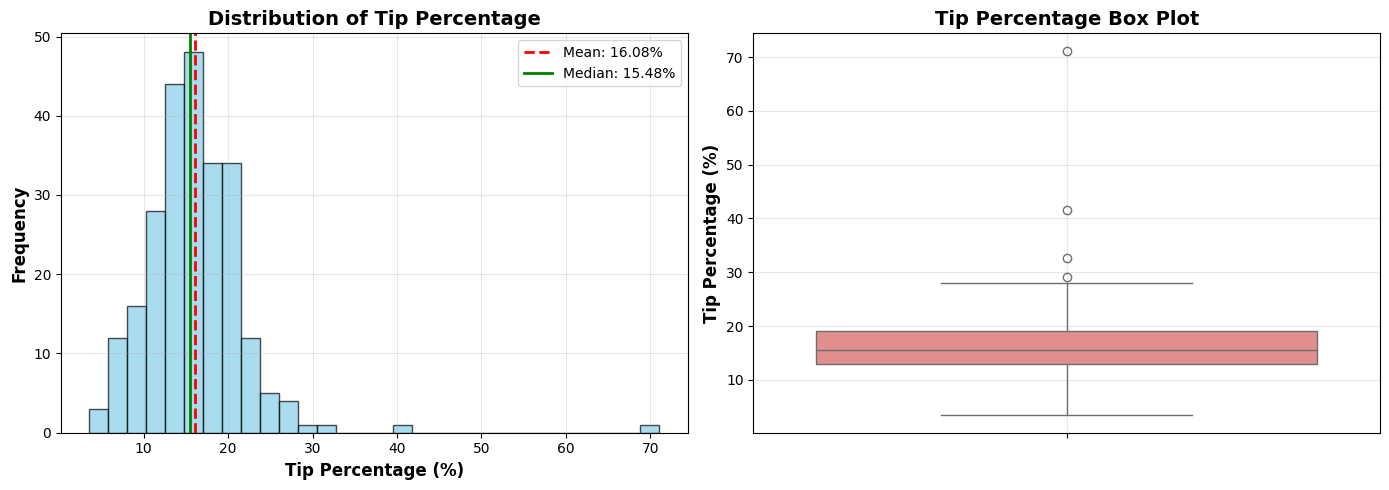


PART 2: CATEGORICAL vs NUMERIC RELATIONSHIPS


/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1046/1368671338.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, ax=axes[i], palette='Set2')
/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1046/1368671338.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, ax=axes[i], palette='Set2')
/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1046/1368671338.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target, ax=axes[i], palette='Set2')
/

Saved: categorical_vs_numeric_boxplots.png


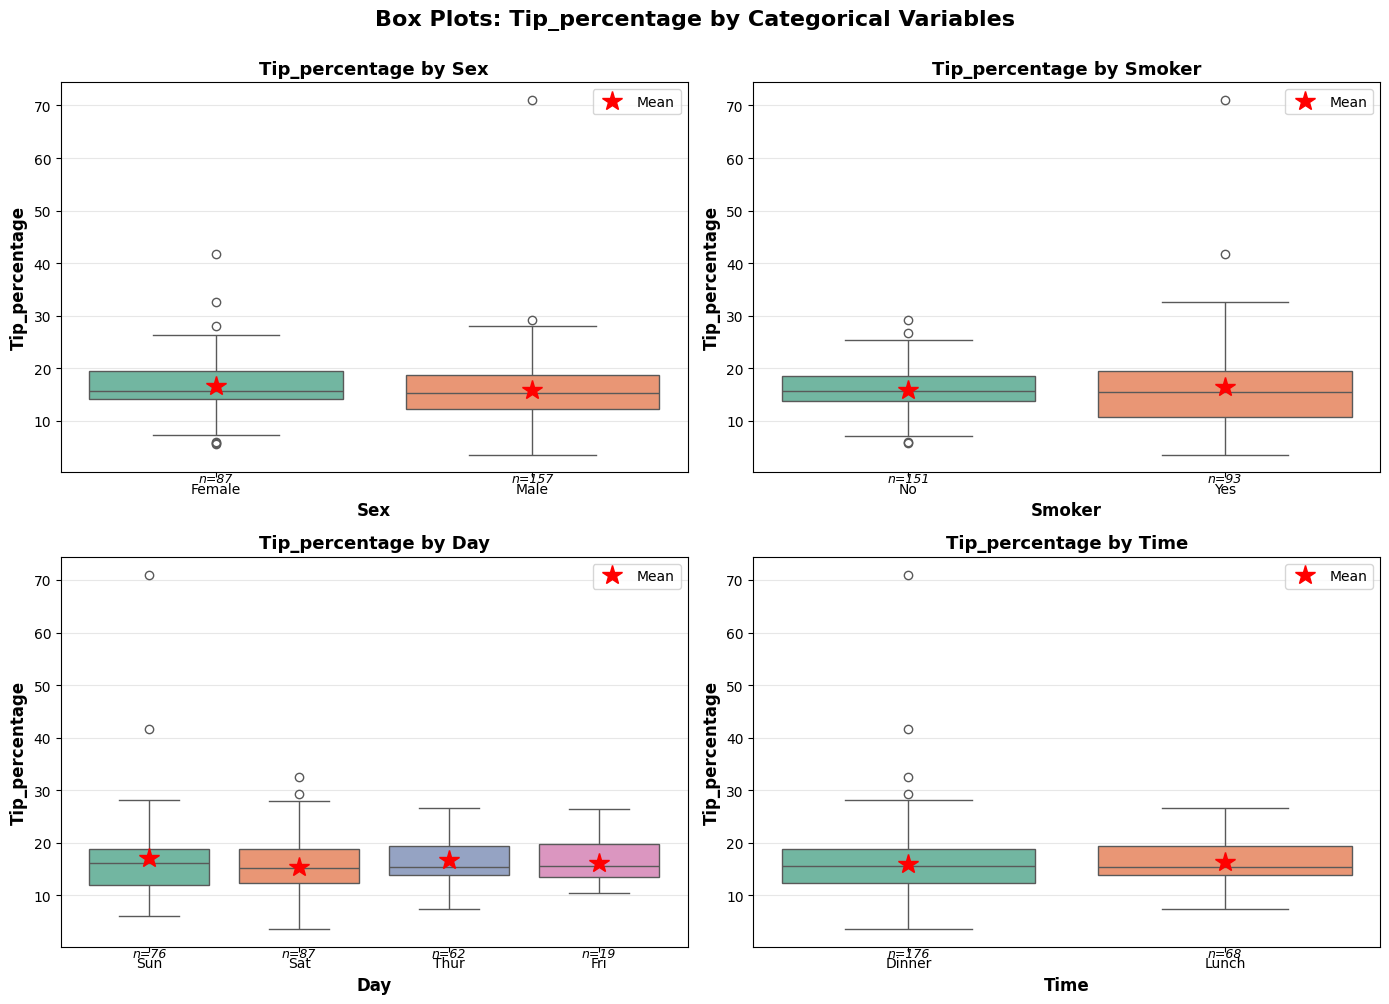


STATISTICAL SIGNIFICANCE TESTS

Testing if group differences are statistically significant...
(p-value < 0.05 means the difference is significant)


SEX:
----------------------------------------------------------------------

Group Statistics:
        count       mean       std       min        max
sex                                                    
Female     87  16.649074  5.363173  5.643341  41.666667
Male      157  15.765055  6.477787  3.563814  71.034483

Independent T-Test:
   T-statistic: 1.0834
   P-value: 0.2797
 NOT SIGNIFICANT: No significant difference between groups

SMOKER:
----------------------------------------------------------------------

Group Statistics:
        count       mean       std       min        max
smoker                                                 
No        151  15.932846  3.990977  5.679667  29.198966
Yes        93  16.319604  8.511920  3.563814  71.034483

Independent T-Test:
   T-statistic: -0.4797
   P-value: 0.6319
 NOT SIGNIFICANT: No s

/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1046/3743317977.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bill_category', y='tip_percentage', ax=axes[1], palette='Set3')


✅ Saved: tip_percentage_vs_bill.png


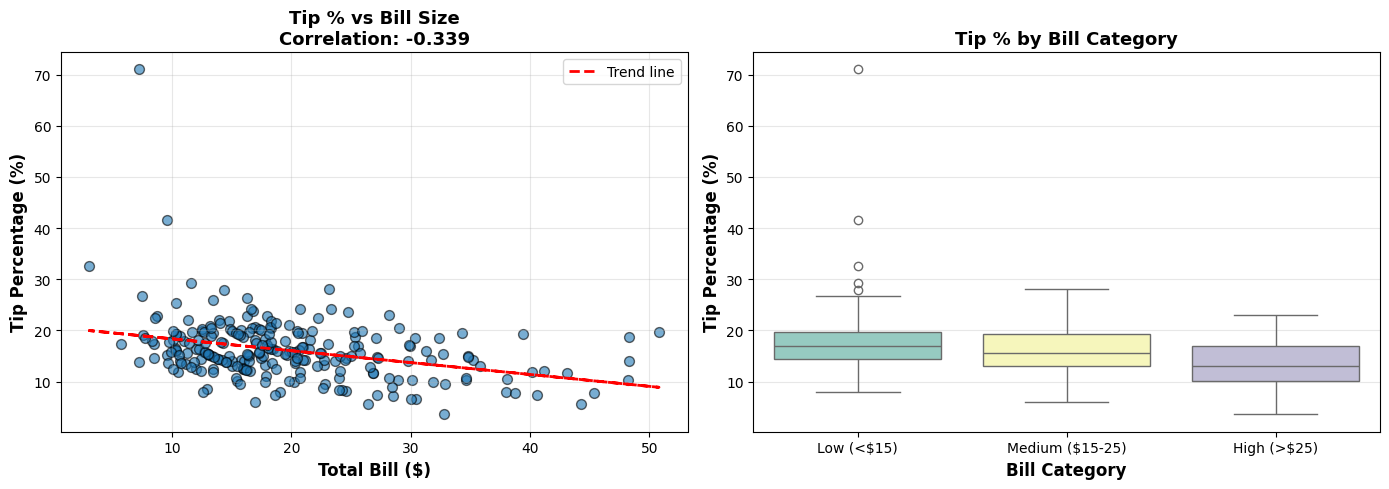


💡 KEY INSIGHT:
   Negative correlation (-0.339): People tip LOWER % on expensive bills!
   This is common - $5 tip on $25 bill (20%) vs $10 tip on $100 bill (10%)


In [20]:
def tip_percentage_analysis(df, cat_cols):
    """
    Special analysis for tip_percentage (the key metric for modeling)
    """
    print("\n" + "="*70)
    print("PART 3: TIP PERCENTAGE DEEP DIVE")
    print("="*70)
    
    # Calculate tip_percentage if not exists
    if 'tip_percentage' not in df.columns:
        df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
        print("✅ Created tip_percentage column")
    
    # 1. Distribution of tip_percentage
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(df['tip_percentage'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0].axvline(df['tip_percentage'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f"Mean: {df['tip_percentage'].mean():.2f}%")
    axes[0].axvline(df['tip_percentage'].median(), color='green', linestyle='-', 
                    linewidth=2, label=f"Median: {df['tip_percentage'].median():.2f}%")
    axes[0].set_xlabel('Tip Percentage (%)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0].set_title('Distribution of Tip Percentage', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Box plot
    sns.boxplot(y=df['tip_percentage'], ax=axes[1], color='lightcoral')
    axes[1].set_ylabel('Tip Percentage (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Tip Percentage Box Plot', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('tip_percentage_distribution.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: tip_percentage_distribution.png")
    plt.show()
    
    # 2. Tip percentage by all categorical variables
    categorical_vs_numeric(df, cat_cols, target='tip_percentage')
    
    # 3. Tip percentage vs bill amount
    print("\n" + "="*70)
    print("TIP PERCENTAGE vs BILL SIZE ANALYSIS")
    print("="*70)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot
    axes[0].scatter(df['total_bill'], df['tip_percentage'], alpha=0.6, s=50, edgecolor='black')
    
    # Add trend line
    z = np.polyfit(df['total_bill'], df['tip_percentage'], 1)
    p = np.poly1d(z)
    axes[0].plot(df['total_bill'], p(df['total_bill']), "r--", linewidth=2, label='Trend line')
    
    corr = df['total_bill'].corr(df['tip_percentage'])
    axes[0].set_xlabel('Total Bill ($)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Tip Percentage (%)', fontsize=12, fontweight='bold')
    axes[0].set_title(f'Tip % vs Bill Size\nCorrelation: {corr:.3f}', 
                     fontsize=13, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # # Binned analysis
    df['bill_category'] = pd.cut(df['total_bill'], bins=[0, 15, 25, 100], 
                                  labels=['Low (<$15)', 'Medium ($15-25)', 'High (>$25)'])
    
    sns.boxplot(data=df, x='bill_category', y='tip_percentage', ax=axes[1], palette='Set3')
    axes[1].set_xlabel('Bill Category', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Tip Percentage (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Tip % by Bill Category', fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('tip_percentage_vs_bill.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: tip_percentage_vs_bill.png")
    plt.show()
    
    # Statistical insight
    print("\n💡 KEY INSIGHT:")
    if corr < -0.1:
        print(f"   Negative correlation ({corr:.3f}): People tip LOWER % on expensive bills!")
        print("   This is common - $5 tip on $25 bill (20%) vs $10 tip on $100 bill (10%)")
    elif corr > 0.1:
        print(f"   Positive correlation ({corr:.3f}): People tip HIGHER % on expensive bills!")
    else:
        print(f"   Weak correlation ({corr:.3f}): Tip % is fairly consistent across bill sizes")

tip_percentage_analysis(df,cat_cols)

#### Multivariate Analysis

PART 1: ADVANCED CORRELATION ANALYSIS
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000
✅ Saved: advanced_correlation.png


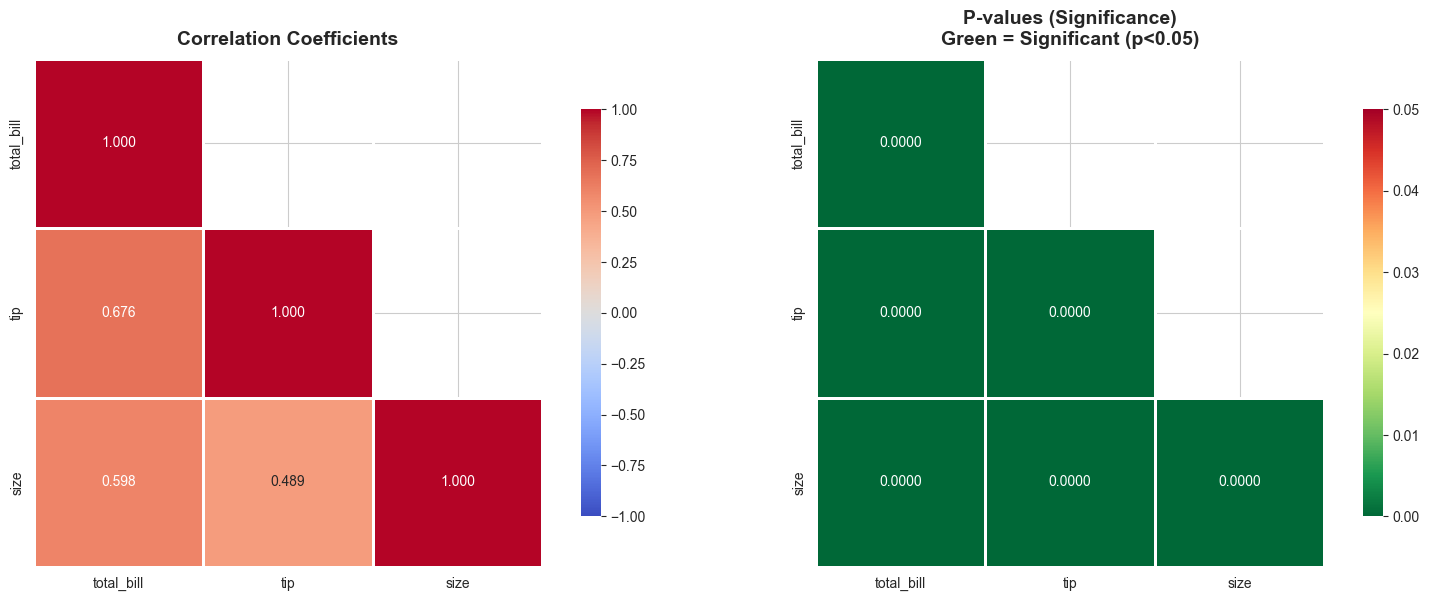


CORRELATION STRENGTH GUIDE

    Correlation (r)     Strength        Interpretation
    ─────────────────────────────────────────────────────────
    0.00 - 0.19         Very Weak       Negligible relationship
    0.20 - 0.39         Weak            Low correlation
    0.40 - 0.59         Moderate        Moderate correlation
    0.60 - 0.79         Strong          Strong correlation
    0.80 - 1.00         Very Strong     Very strong correlation
    

DETAILED CORRELATION ANALYSIS

total_bill ↔ tip:
  Correlation:  0.6757 (Strong positive)
  P-value:      0.0000 ✅ Significant

total_bill ↔ size:
  Correlation:  0.5983 (Moderate positive)
  P-value:      0.0000 ✅ Significant

tip ↔ size:
  Correlation:  0.4893 (Moderate positive)
  P-value:      0.0000 ✅ Significant


In [21]:

"""
MULTIVARIATE ANALYSIS - Tips Dataset
Goal: Understand complex relationships between multiple variables
Covers: Correlation, Multicollinearity, PCA, Advanced Visualizations
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================
# PART 1: ADVANCED CORRELATION ANALYSIS
# ============================================

def advanced_correlation_analysis(df, num_cols):
    """
    Deep dive into correlations with statistical significance
    """
    print("="*70)
    print("PART 1: ADVANCED CORRELATION ANALYSIS")
    print("="*70)
    
    # Calculate correlation matrix
    corr_matrix = df[num_cols].corr()
    print(corr_matrix)

    # Calculate p-values for correlations
    n = len(df)
    p_values = np.zeros((len(num_cols), len(num_cols)))
    
    for i, col1 in enumerate(num_cols):
        for j, col2 in enumerate(num_cols):
            if i != j:
                _, p_val = stats.pearsonr(df[col1], df[col2])
                p_values[i, j] = p_val
    
    # Create figure with 2 heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    # Heatmap 1: Correlation coefficients
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
                mask=mask, vmin=-1, vmax=1, ax=axes[0])
    axes[0].set_title('Correlation Coefficients', fontsize=14, fontweight='bold', pad=10)
    

    # Heatmap 2: P-values
    p_df = pd.DataFrame(p_values, index=num_cols, columns=num_cols)
    sns.heatmap(p_df, annot=True, fmt='.4f', cmap='RdYlGn_r', 
                square=True, linewidths=2, cbar_kws={"shrink": 0.8},
                mask=mask, vmin=0, vmax=0.05, ax=axes[1])
    axes[1].set_title('P-values (Significance)\nGreen = Significant (p<0.05)', 
                     fontsize=14, fontweight='bold', pad=10)
    
    plt.tight_layout()
    plt.savefig('advanced_correlation.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: advanced_correlation.png")
    plt.show()

    # Print correlation strength interpretation
    print("\n" + "="*70)
    print("CORRELATION STRENGTH GUIDE")
    print("="*70)
    print("""
    Correlation (r)     Strength        Interpretation
    ─────────────────────────────────────────────────────────
    0.00 - 0.19         Very Weak       Negligible relationship
    0.20 - 0.39         Weak            Low correlation
    0.40 - 0.59         Moderate        Moderate correlation
    0.60 - 0.79         Strong          Strong correlation
    0.80 - 1.00         Very Strong     Very strong correlation
    """)
    
    # Print detailed correlation analysis
    print("\n" + "="*70)
    print("DETAILED CORRELATION ANALYSIS")
    print("="*70)
    
    # Get all unique pairs
    for i in range(len(num_cols)):
        for j in range(i+1, len(num_cols)):
            corr_val = corr_matrix.iloc[i, j]
            p_val = p_values[i, j]
            
            # Determine strength
            abs_corr = abs(corr_val)
            if abs_corr >= 0.8:
                strength = "Very Strong"
            elif abs_corr >= 0.6:
                strength = "Strong"
            elif abs_corr >= 0.4:
                strength = "Moderate"
            elif abs_corr >= 0.2:
                strength = "Weak"
            else:
                strength = "Very Weak"
            
            direction = "positive" if corr_val > 0 else "negative"
            significant = "✅ Significant" if p_val < 0.05 else "❌ Not Significant"
            
            print(f"\n{num_cols[i]} ↔ {num_cols[j]}:")
            print(f"  Correlation: {corr_val:7.4f} ({strength} {direction})")
            print(f"  P-value:     {p_val:7.4f} {significant}")



advanced_correlation_analysis(df,num_cols)

In [22]:
pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



PART 2: MULTICOLLINEARITY DETECTION

📖 What is Multicollinearity?
----------------------------------------------------------------------

    Multicollinearity occurs when predictor variables are highly correlated
    with each other. This is a problem for regression models because:
    
    1. Makes coefficients unstable (small data changes = big coefficient changes)
    2. Makes it hard to determine individual feature importance
    3. Inflates standard errors (less reliable predictions)
    
    Example: If 'bill_per_person' = total_bill/size, these 3 variables are
    mathematically related, causing multicollinearity!
    

VARIANCE INFLATION FACTOR (VIF)

    VIF Interpretation:
    ─────────────────────────────────────────
    VIF = 1         No correlation
    VIF < 5         Low multicollinearity (acceptable)
    VIF 5-10        Moderate multicollinearity (concerning)
    VIF > 10        High multicollinearity (problem!)
    

   Feature      VIF
total_bill 8.684373
      size

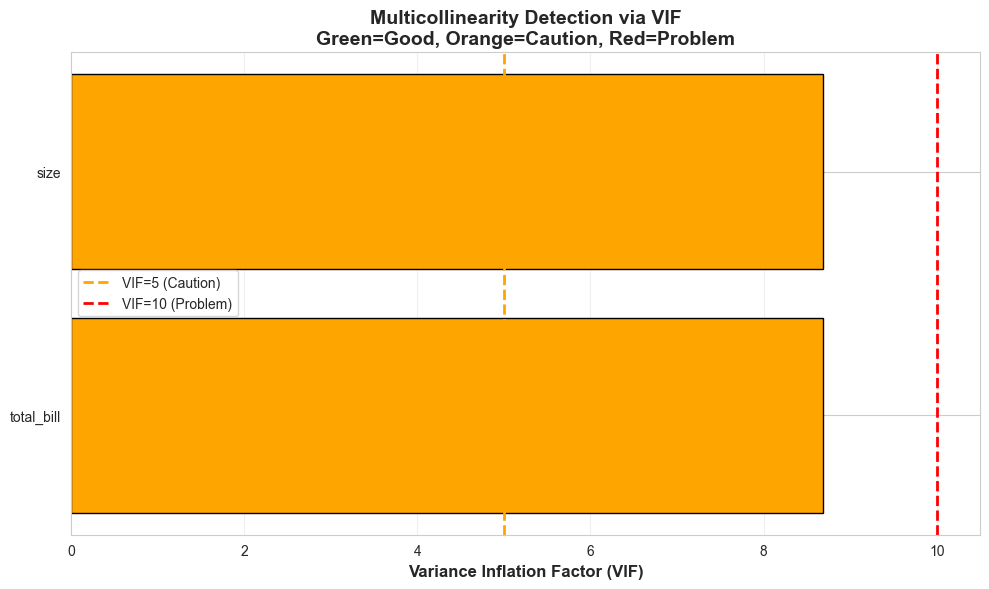


🔍 MULTICOLLINEARITY DIAGNOSIS

⚠️  MODERATE MULTICOLLINEARITY:
   • total_bill: VIF = 8.68
   • size: VIF = 8.68

   Recommendation: Monitor these features, may need action.


,Feature,VIF
0,total_bill,8.684373
1,size,8.684373


In [23]:

def detect_multicollinearity(df, num_cols):
    """
    Detect multicollinearity using VIF (Variance Inflation Factor)
    """
    print("\n" + "="*70)
    print("PART 2: MULTICOLLINEARITY DETECTION")
    print("="*70)
    
    print("\n📖 What is Multicollinearity?")
    print("-" * 70)
    print("""
    Multicollinearity occurs when predictor variables are highly correlated
    with each other. This is a problem for regression models because:
    
    1. Makes coefficients unstable (small data changes = big coefficient changes)
    2. Makes it hard to determine individual feature importance
    3. Inflates standard errors (less reliable predictions)
    
    Example: If 'bill_per_person' = total_bill/size, these 3 variables are
    mathematically related, causing multicollinearity!
    """)
    
    # Calculate VIF for each variable
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    # Prepare data (remove target if present)
    X = df[num_cols].dropna()
    
    print("\n" + "="*70)
    print("VARIANCE INFLATION FACTOR (VIF)")
    print("="*70)
    print("""
    VIF Interpretation:
    ─────────────────────────────────────────
    VIF = 1         No correlation
    VIF < 5         Low multicollinearity (acceptable)
    VIF 5-10        Moderate multicollinearity (concerning)
    VIF > 10        High multicollinearity (problem!)
    """)
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    # Sort by VIF
    vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)
    
    print("\n" + vif_data.to_string(index=False))
    
    # Visualize VIF
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_data['VIF']]
    bars = ax.barh(vif_data['Feature'], vif_data['VIF'], color=colors, edgecolor='black')
    
    # Add threshold lines
    ax.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='VIF=5 (Caution)')
    ax.axvline(x=10, color='red', linestyle='--', linewidth=2, label='VIF=10 (Problem)')
    
    ax.set_xlabel('Variance Inflation Factor (VIF)', fontsize=12, fontweight='bold')
    ax.set_title('Multicollinearity Detection via VIF\nGreen=Good, Orange=Caution, Red=Problem', 
                fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig('multicollinearity_vif.png', dpi=300, bbox_inches='tight')
    print("\n✅ Saved: multicollinearity_vif.png")
    plt.show()
    
    # Print recommendations
    print("\n" + "="*70)
    print("🔍 MULTICOLLINEARITY DIAGNOSIS")
    print("="*70)
    
    high_vif = vif_data[vif_data['VIF'] > 10]
    moderate_vif = vif_data[(vif_data['VIF'] >= 5) & (vif_data['VIF'] <= 10)]
    low_vif = vif_data[vif_data['VIF'] < 5]
    
    if len(high_vif) > 0:
        print("\n⚠️  HIGH MULTICOLLINEARITY DETECTED:")
        for _, row in high_vif.iterrows():
            print(f"   • {row['Feature']}: VIF = {row['VIF']:.2f}")
        print("\n   Recommendation: Consider removing or combining these features!")
    
    if len(moderate_vif) > 0:
        print("\n⚠️  MODERATE MULTICOLLINEARITY:")
        for _, row in moderate_vif.iterrows():
            print(f"   • {row['Feature']}: VIF = {row['VIF']:.2f}")
        print("\n   Recommendation: Monitor these features, may need action.")
    
    if len(low_vif) > 0:
        print("\n✅ LOW MULTICOLLINEARITY (Good!):")
        for _, row in low_vif.iterrows():
            print(f"   • {row['Feature']}: VIF = {row['VIF']:.2f}")
    
    return vif_data
predictor_columns=[col for col in num_cols if col!='tip']
detect_multicollinearity(df,predictor_columns)

#### What can be done here is---
#### df['bill_per_person'] = df['total_bill'] / df['size']
#### and test the multicollinearity



PART 2: MULTICOLLINEARITY DETECTION

📖 What is Multicollinearity?
----------------------------------------------------------------------

    Multicollinearity occurs when predictor variables are highly correlated
    with each other. This is a problem for regression models because:
    
    1. Makes coefficients unstable (small data changes = big coefficient changes)
    2. Makes it hard to determine individual feature importance
    3. Inflates standard errors (less reliable predictions)
    
    Example: If 'bill_per_person' = total_bill/size, these 3 variables are
    mathematically related, causing multicollinearity!
    

VARIANCE INFLATION FACTOR (VIF)

    VIF Interpretation:
    ─────────────────────────────────────────
    VIF = 1         No correlation
    VIF < 5         Low multicollinearity (acceptable)
    VIF 5-10        Moderate multicollinearity (concerning)
    VIF > 10        High multicollinearity (problem!)
    

        Feature      VIF
           size 5.082313


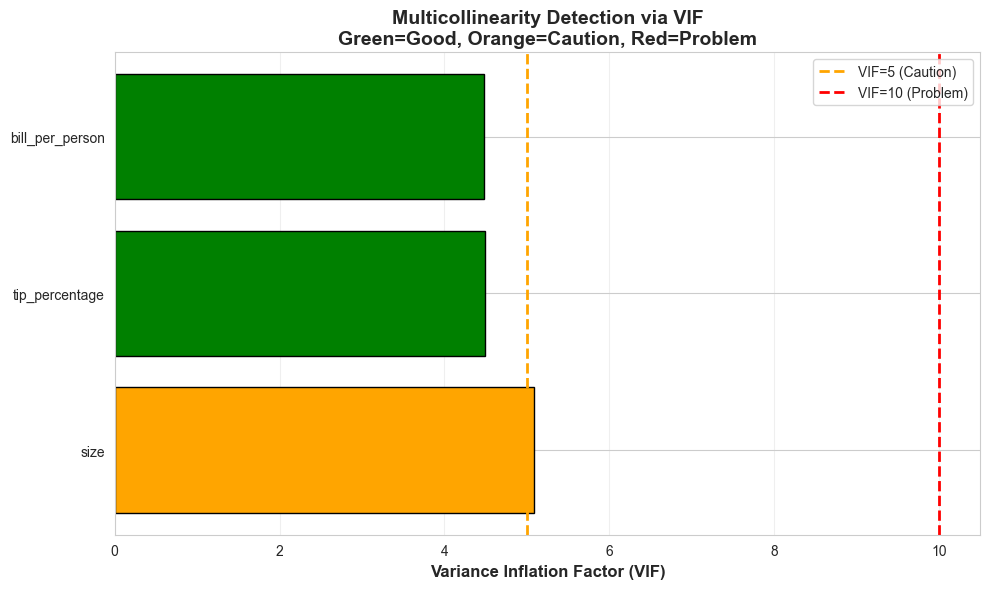


🔍 MULTICOLLINEARITY DIAGNOSIS

⚠️  MODERATE MULTICOLLINEARITY:
   • size: VIF = 5.08

   Recommendation: Monitor these features, may need action.

✅ LOW MULTICOLLINEARITY (Good!):
   • tip_percentage: VIF = 4.49
   • bill_per_person: VIF = 4.48


,Feature,VIF
0,size,5.082313
1,tip_percentage,4.491907
2,bill_per_person,4.476937


In [211]:
df['bill_per_person'] = df['total_bill'] / df['size']
df['bill_per_person']
df=df.drop(columns=('total_bill'))
num_cols=df.select_dtypes(include='number').columns.tolist()

predictor_columns=[col for col in num_cols if col!='tip']
detect_multicollinearity(df,predictor_columns)


In [212]:
# not using right now, but keeping for furture use:
def perform_pca(df, num_cols, n_components=None):
    """
    Perform PCA for dimensionality reduction and pattern discovery
    """
    print("\n" + "="*70)
    print("PART 3: PRINCIPAL COMPONENT ANALYSIS (PCA)")
    print("="*70)
    
    print("\n📖 What is PCA?")
    print("-" * 70)
    print("""
    PCA (Principal Component Analysis) is a technique that:
    
    1. Finds the "directions" in your data with maximum variance
    2. Reduces many correlated variables into fewer uncorrelated components
    3. Helps visualize high-dimensional data in 2D/3D
    4. Can reveal hidden patterns and clusters
    
    Example: If 'total_bill', 'tip', and 'size' are correlated, PCA might
    find that one component captures "meal expense" (all 3 combined).
    """)
    
    # Prepare data
    X = df[num_cols].dropna()
    
    # Standardize features (PCA requires this!)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    if n_components is None:
        n_components = len(num_cols)
    
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Create visualizations
    fig = plt.figure(figsize=(18, 12))
    
    # Plot 1: Explained Variance
    ax1 = plt.subplot(2, 3, 1)
    explained_var = pca.explained_variance_ratio_ * 100
    cumulative_var = np.cumsum(explained_var)
    
    ax1.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, 
            color='skyblue', edgecolor='black', label='Individual')
    ax1.plot(range(1, len(cumulative_var)+1), cumulative_var, 'ro-', 
             linewidth=2, markersize=8, label='Cumulative')
    ax1.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% threshold')
    ax1.set_xlabel('Principal Component', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Variance Explained (%)', fontsize=11, fontweight='bold')
    ax1.set_title('Explained Variance by Component', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Scree Plot
    ax2 = plt.subplot(2, 3, 2)
    ax2.plot(range(1, len(explained_var)+1), explained_var, 'bo-', linewidth=2, markersize=8)
    ax2.set_xlabel('Principal Component', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Variance Explained (%)', fontsize=11, fontweight='bold')
    ax2.set_title('Scree Plot (Elbow Method)', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Component Loadings (PC1 vs PC2)
    ax3 = plt.subplot(2, 3, 3)
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    
    for i, feature in enumerate(num_cols):
        ax3.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
                 head_width=0.1, head_length=0.1, fc='red', ec='red')
        ax3.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, 
                fontsize=10, ha='center', fontweight='bold')
    
    ax3.set_xlabel(f'PC1 ({explained_var[0]:.1f}%)', fontsize=11, fontweight='bold')
    ax3.set_ylabel(f'PC2 ({explained_var[1]:.1f}% if len(explained_var)>1 else 0:.1f%)', fontsize=11, fontweight='bold')
    ax3.set_title('Feature Loadings (PC1 vs PC2)', fontsize=12, fontweight='bold')
    ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax3.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax3.grid(True, alpha=0.3)
    ax3.set_aspect('equal')
    
    # Plot 4: Data in PC space (PC1 vs PC2)
    ax4 = plt.subplot(2, 3, 4)
    scatter = ax4.scatter(X_pca[:, 0], X_pca[:, 1], c=df['tip_percentage'] if 'tip_percentage' in df.columns else 'blue', 
                         cmap='viridis', alpha=0.6, s=50, edgecolor='black')
    ax4.set_xlabel(f'PC1 ({explained_var[0]:.1f}%)', fontsize=11, fontweight='bold')
    ax4.set_ylabel(f'PC2 ({explained_var[1]:.1f}% if len(explained_var)>1 else 0:.1f%)', fontsize=11, fontweight='bold')
    ax4.set_title('Data Projected onto PC1 vs PC2', fontsize=12, fontweight='bold')
    if 'tip_percentage' in df.columns:
        plt.colorbar(scatter, ax=ax4, label='Tip %')
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Heatmap of component loadings
    ax5 = plt.subplot(2, 3, 5)
    loadings_df = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=num_cols
    )
    sns.heatmap(loadings_df, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax5)
    ax5.set_title('Component Loadings Matrix', fontsize=12, fontweight='bold')
    
    # Plot 6: Variance table
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    variance_table = f"""
    PCA SUMMARY STATISTICS
    {'='*45}
    
    Component    Variance%    Cumulative%
    {'─'*45}
    """
    for i in range(len(explained_var)):
        variance_table += f"\n    PC{i+1}         {explained_var[i]:6.2f}%       {cumulative_var[i]:6.2f}%"
    
    variance_table += f"\n\n    Total Components: {n_components}"
    variance_table += f"\n    Original Features: {len(num_cols)}"
    
    # Find components needed for 80% variance
    components_80 = np.argmax(cumulative_var >= 80) + 1 if any(cumulative_var >= 80) else n_components
    variance_table += f"\n    Components for 80% variance: {components_80}"
    
    reduction = (1 - components_80/len(num_cols)) * 100
    variance_table += f"\n    Dimensionality reduction: {reduction:.1f}%"
    
    ax6.text(0.1, 0.9, variance_table, transform=ax6.transAxes, 
            fontsize=10, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.suptitle('Principal Component Analysis (PCA) - Complete Overview', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: pca_analysis.png")
    plt.show()
    
    # Print detailed analysis
    print("\n" + "="*70)
    print("PCA INTERPRETATION GUIDE")
    print("="*70)
    
    print(f"\n📊 Variance Explained:")
    for i, (var, cum_var) in enumerate(zip(explained_var, cumulative_var)):
        print(f"   PC{i+1}: {var:6.2f}% (Cumulative: {cum_var:6.2f}%)")
    
    print(f"\n💡 KEY INSIGHTS:")
    print(f"   • First component (PC1) explains {explained_var[0]:.1f}% of variance")
    print(f"   • {components_80} components capture 80% of information")
    print(f"   • You could reduce from {len(num_cols)} to {components_80} features!")
    
    print(f"\n📈 Component Loadings (What each PC represents):")
    for i in range(min(3, n_components)):  # Show first 3 components
        print(f"\n   PC{i+1} (explains {explained_var[i]:.1f}%):")
        component_loadings = pd.Series(pca.components_[i], index=num_cols).abs().sort_values(ascending=False)
        for feature, loading in component_loadings.items():
            print(f"      {feature:20s}: {pca.components_[i][list(num_cols).index(feature)]:7.3f}")
    
    return pca, X_pca, loadings_df



PART 4: ADVANCED PAIRPLOT ANALYSIS
✅ Saved: advanced_pairplot.png


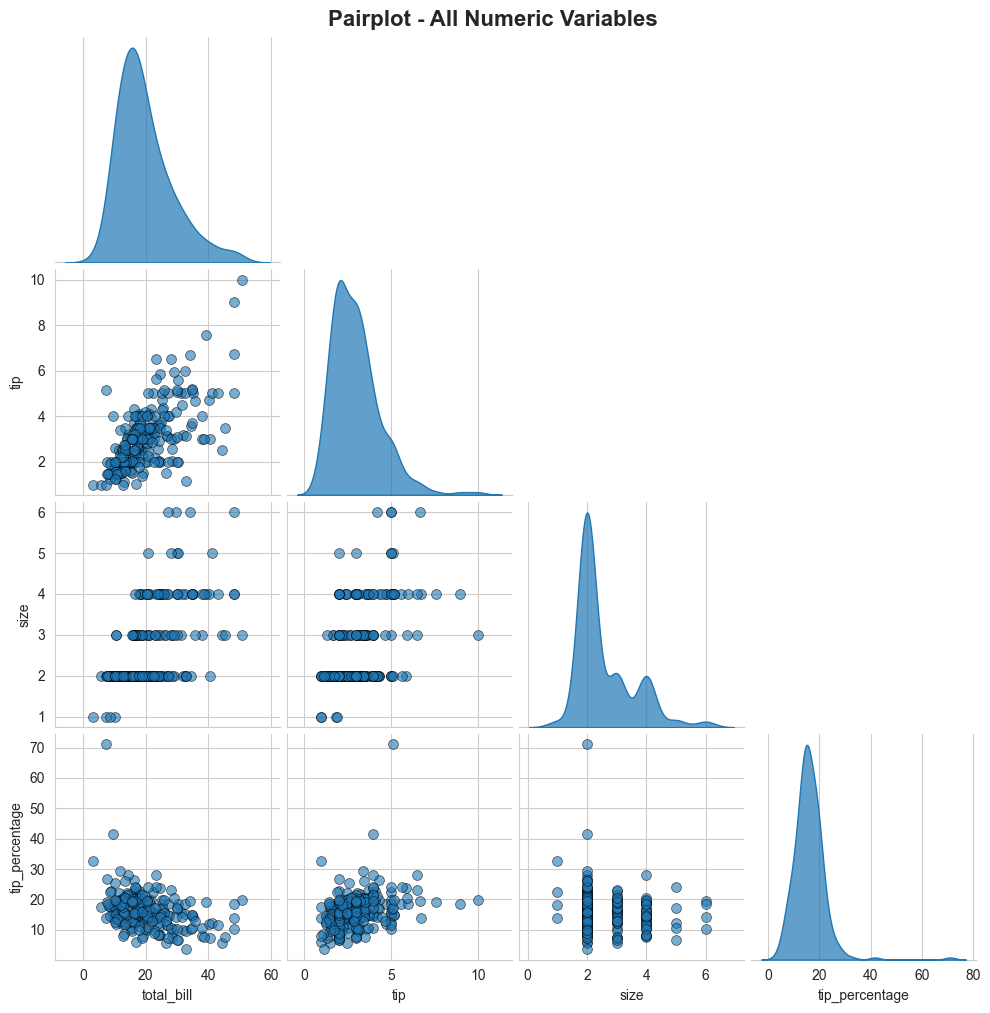


💡 How to Read This:
   • Diagonal: Distribution of each variable
   • Off-diagonal: Scatter plots showing relationships
   • Look for linear patterns, clusters, or outliers


In [24]:
# ============================================
# PART 4: PAIRPLOT WITH CATEGORICAL OVERLAY
# ============================================

def advanced_pairplot(df, num_cols, cat_col=None):
    """
    Create advanced pairplot with categorical coloring
    """
    print("\n" + "="*70)
    print("PART 4: ADVANCED PAIRPLOT ANALYSIS")
    print("="*70)
    
    # Select columns for pairplot
    plot_cols = num_cols.copy()
    if 'tip_percentage' in df.columns and 'tip_percentage' not in plot_cols:
        plot_cols.append('tip_percentage')
    
    # Create pairplot
    if cat_col and cat_col in df.columns:
        g = sns.pairplot(df[plot_cols + [cat_col]], hue=cat_col, 
                        diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'black'},
                        diag_kws={'alpha': 0.7}, corner=True)
        g.fig.suptitle(f'Pairplot Colored by {cat_col}', y=1.01, fontsize=16, fontweight='bold')
    else:
        g = sns.pairplot(df[plot_cols], diag_kind='kde', 
                        plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'black'},
                        diag_kws={'alpha': 0.7}, corner=True)
        g.fig.suptitle('Pairplot - All Numeric Variables', y=1.01, fontsize=16, fontweight='bold')
    
    plt.savefig('advanced_pairplot.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: advanced_pairplot.png")
    plt.show()
    
    print("\n💡 How to Read This:")
    print("   • Diagonal: Distribution of each variable")
    print("   • Off-diagonal: Scatter plots showing relationships")
    print("   • Look for linear patterns, clusters, or outliers")

advanced_pairplot(df,num_cols)

##### “The pairplot shows that most customers come in small groups (size=2), usually spend around $7–12 per person, and tip around 15%. Tip amounts increase with bill size, but tip percentage decreases as bill per person increases. Group size does not strongly predict tipping behavior. The dataset contains several high-tip outliers.”

#### Detect outliers

PART 1: COMPREHENSIVE OUTLIER DETECTION

📖 Why Outliers Matter:
----------------------------------------------------------------------

    Outliers can:
    1. Skew statistical measures (mean, correlation)
    2. Violate model assumptions
    3. Be errors OR valuable insights (high-value customers!)
    4. Affect prediction accuracy
    
    We'll use 3 methods: Z-score, IQR, and Isolation Forest
    

METHOD 1: Z-SCORE (Univariate)
Rule: |Z-score| > 3 indicates outlier
z outliers df are      total_bill    tip  sex  smoker  time  size  tip_percentage  day_Fri  \
23        39.42   7.58    1       0     0     4       19.228818    False   
59        48.27   6.73    1       0     0     4       13.942407    False   
125       29.80   4.20    0       0     1     6       14.093960    False   
141       34.30   6.70    1       0     1     6       19.533528    False   
143       27.05   5.00    0       0     1     6       18.484288    False   
156       48.17   5.00    1       0     0     6   

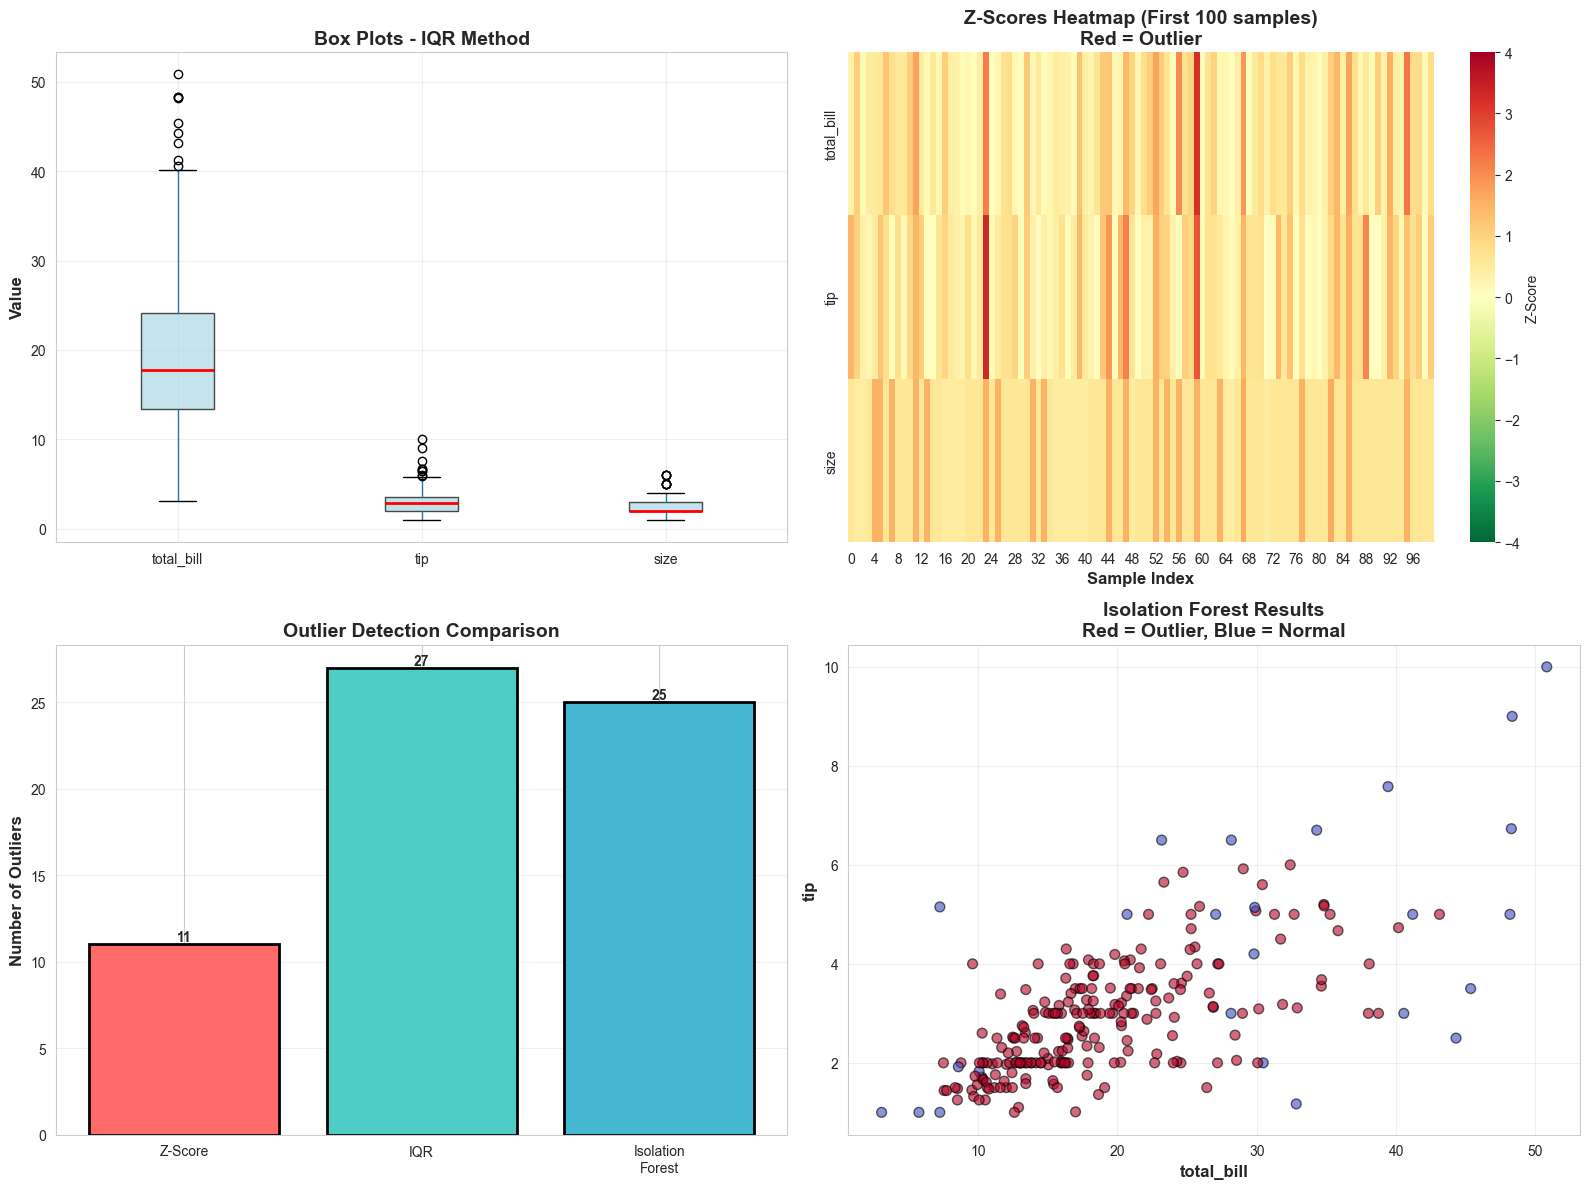

strong outlier 
      total_bill    tip  sex  smoker  time  size  tip_percentage  day_Fri  \
23        39.42   7.58    1       0     0     4       19.228818    False   
59        48.27   6.73    1       0     0     4       13.942407    False   
125       29.80   4.20    0       0     1     6       14.093960    False   
141       34.30   6.70    1       0     1     6       19.533528    False   
143       27.05   5.00    0       0     1     6       18.484288    False   
156       48.17   5.00    1       0     0     6       10.379905    False   
170       50.81  10.00    1       1     0     3       19.681165    False   
212       48.33   9.00    1       0     0     4       18.621974    False   

     day_Sat  day_Sun  day_Thur  bill_category_Low (<$15)  \
23      True    False     False                     False   
59      True    False     False                     False   
125    False    False      True                     False   
141    False    False      True                     Fa

In [47]:
from sklearn.ensemble import IsolationForest, RandomForestRegressor
def detect_outliers_comprehensive(df, num_cols):
    """
    Multiple methods for outlier detection
    """
    print("="*70)
    print("PART 1: COMPREHENSIVE OUTLIER DETECTION")
    print("="*70)
    
    print("\n📖 Why Outliers Matter:")
    print("-" * 70)
    print("""
    Outliers can:
    1. Skew statistical measures (mean, correlation)
    2. Violate model assumptions
    3. Be errors OR valuable insights (high-value customers!)
    4. Affect prediction accuracy
    
    We'll use 3 methods: Z-score, IQR, and Isolation Forest
    """)
    
    # Method 1: Z-Score (univariate)
    print("\n" + "="*70)
    print("METHOD 1: Z-SCORE (Univariate)")
    print("="*70)
    print("Rule: |Z-score| > 3 indicates outlier")
    
    z_scores = np.abs(stats.zscore(df[num_cols].dropna()))
    z_outliers = (z_scores > 3).sum(axis=0)
    z_outlier_mask=(z_scores >3).any(axis=1)
    print(f'z outliers df are {df[z_outlier_mask]}')

    print(z_outliers)

    print("\nOutliers detected per variable:")
    for col, count in zip(num_cols, z_outliers):
        pct = (count / len(df)) * 100
        print(f"  {col:20s}: {count:4d} ({pct:5.2f}%)")


     # Method 2: IQR (univariate)
    print("\n" + "="*70)
    print("METHOD 2: IQR (Interquartile Range)")
    print("="*70)
    print("Rule: Below Q1-1.5*IQR or Above Q3+1.5*IQR")
    
    iqr_outliers = {}
    iqr_outlier_mask=pd.Series(False,index=df.index)
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        iqr_outliers[col] = len(outliers)
        pct = (len(outliers) / len(df)) * 100
        print(f"  {col:20s}: {len(outliers):4d} ({pct:5.2f}%)")
        iqr_outlier_mask |= (df[col] < lower_bound) | (df[col] > upper_bound)


    print("IQR Outliers:")
    print(df[iqr_outlier_mask])
    
    # Method 3: Isolation Forest (multivariate)
    print("\n" + "="*70)
    print("METHOD 3: ISOLATION FOREST (Multivariate)")
    print("="*70)
    print("Detects outliers considering ALL variables simultaneously")
    
    X = df[num_cols].dropna()
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    outlier_labels = iso_forest.fit_predict(X)
    iso_mask = (outlier_labels == -1)
    n_outliers = (outlier_labels == -1).sum()
    pct = (n_outliers / len(X)) * 100
    
    print(f"\nMultivariate outliers detected: {n_outliers} ({pct:.2f}%)")


    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Box plots
    ax1 = axes[0, 0]
    df[num_cols].boxplot(ax=ax1, patch_artist=True, 
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
    ax1.set_title('Box Plots - IQR Method', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Z-score heatmap
    ax2 = axes[0, 1]
    z_score_df = pd.DataFrame(z_scores, columns=num_cols)
    sample_size = min(100, len(z_score_df))
    sns.heatmap(z_score_df.iloc[:sample_size].T, cmap='RdYlGn_r', center=0,
                vmin=-4, vmax=4, ax=ax2, cbar_kws={'label': 'Z-Score'})
    ax2.set_title(f'Z-Scores Heatmap (First {sample_size} samples)\nRed = Outlier', 
                  fontsize=14, fontweight='bold')
    ax2.set_xlabel('Sample Index', fontsize=12, fontweight='bold')
    
    # Plot 3: Outlier summary bar chart
    ax3 = axes[1, 0]
    methods = ['Z-Score', 'IQR', 'Isolation\nForest']
    total_outliers = [z_outliers.sum(), sum(iqr_outliers.values()), n_outliers]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    bars = ax3.bar(methods, total_outliers, color=colors, edgecolor='black', linewidth=2)
    ax3.set_ylabel('Number of Outliers', fontsize=12, fontweight='bold')
    ax3.set_title('Outlier Detection Comparison', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    # Plot 4: Isolation Forest visualization (2D projection)
    ax4 = axes[1, 1]
    if len(num_cols) >= 2:
        scatter = ax4.scatter(X[num_cols[0]], X[num_cols[1]], 
                            c=outlier_labels, cmap='coolwarm', 
                            s=50, alpha=0.6, edgecolor='black')
        ax4.set_xlabel(num_cols[0], fontsize=12, fontweight='bold')
        ax4.set_ylabel(num_cols[1], fontsize=12, fontweight='bold')
        ax4.set_title('Isolation Forest Results\nRed = Outlier, Blue = Normal', 
                     fontsize=14, fontweight='bold')
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outlier_detection.png', dpi=300, bbox_inches='tight')
    print("\nSaved: outlier_detection.png")
    plt.show()

    strong_outliers = df[z_outlier_mask & iqr_outlier_mask & iso_mask]
    print(f"strong outlier \n {strong_outliers}")
    


detect_outliers_comprehensive(df,num_cols)

In [51]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [52]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [68]:
# Encode Categorical Variables
#labelEncoder for the ordinal or binomial data
from sklearn.preprocessing import LabelEncoder

def lebel_encoder(df):
    le=LabelEncoder()
    df['sex']=le.fit_transform(df['sex'])
    df['smoker']=le.fit_transform(df['smoker'])
    df['time']=le.fit_transform(df['time'])
    return df

lebel_encoder(df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,0,3
240,27.18,2.00,0,1,Sat,0,2
241,22.67,2.00,1,1,Sat,0,2
242,17.82,1.75,1,0,Sat,0,2


In [69]:
def encode_categorical_features(df):
    df_fe = df.copy()

    # 1. Encode 'day'
    if 'day' in df_fe.columns:
        df_fe = pd.get_dummies(
            df_fe,
            columns=['day'],
            prefix='day'
        )

    return df_fe

df=encode_categorical_features(df)

In [70]:
df.dtypes

total_bill    float64
tip           float64
sex             int64
smoker          int64
time            int64
size            int64
day_Fri          bool
day_Sat          bool
day_Sun          bool
day_Thur         bool
dtype: object

#### Let's do feature engineering


- ✔ Split first
- ✔ Drop categorical columns
- ✔ Scale numerical features after split
- ✔ SelectKBest applied on scaled data
- ✔ Selected feature names recovered
- ✔ Converted back to DataFrame properly

## Build and train models

In [71]:
# 1. Start fresh - drop leakage features BEFORE train/test split
from sklearn.model_selection import train_test_split
leakage_features = [
    'tip_percentage',           # Contains tip directly
    'tip_per_person',           # Contains tip directly
    'tipper_category',          # Based on tip_percentage
    'tipper_category_Fair (10-15%)',
    'tipper_category_Good (15-20%)',
    'tipper_category_Generous (>20%)',
    'is_generous_tipper',       # Based on tip_percentage
    'is_poor_tipper'            # Based on tip_percentage
]

# Drop from your featured_df
featured_df_clean = df.drop(columns=leakage_features, errors='ignore')

# 2. Now split
X = featured_df_clean.drop('tip', axis=1)
y = featured_df_clean['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 6. Train model again
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

print("\n📊 Linear Regression Results (WITHOUT LEAKAGE):")
print(f"Train R²: {r2_score(y_train, y_pred_train):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"Test RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")
print(f"Test MAE: ${mean_absolute_error(y_test, y_pred_test):.4f}")


📊 Linear Regression Results (WITHOUT LEAKAGE):
Train R²: 0.4582
Test R²: 0.4373
Test RMSE: $0.8387
Test MAE: $0.6671


In [63]:
X_train.columns

Index(['total_bill', 'sex', 'smoker', 'time', 'size', 'day_Fri', 'day_Sat',
       'day_Sun', 'day_Thur'],
      dtype='object')

### Exploring other models

In [72]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        'Model': name,
        'Train R²': r2_score(y_train, model.predict(X_train_scaled)),
        'Test R²': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values('Test R²', ascending=False)
print("\n🏆 Model Comparison:")
print(results_df.to_string(index=False))


🏆 Model Comparison:
            Model  Train R²  Test R²     RMSE      MAE
 Lasso Regression  0.445356 0.510221 0.782438 0.654809
 Ridge Regression  0.458237 0.438233 0.837969 0.667062
Linear Regression  0.458249 0.437302 0.838664 0.667133
Gradient Boosting  0.870205 0.322633 0.920157 0.739223
    Random Forest  0.904745 0.255048 0.964971 0.764671


#### Step-by-Step: Save Model & Predict on Unseen Data

In [74]:
## Step 1: Train & Save the Best Model
import pickle
from sklearn.linear_model import Lasso
import json

# 1. Train the best model (Lasso)
best_model = Lasso(alpha=0.1)
best_model.fit(X_train_scaled, y_train)

# 2. Save the model
with open('tip_predictor_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# 3. Save the scaler (CRITICAL!)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



# 6. Save column names used during training
with open('training_columns.json', 'w') as f:
    json.dump(list(X_train.columns), f)

print("✅ Model, scaler, and metadata saved!")

✅ Model, scaler, and metadata saved!


In [76]:
def procesand_predict(df):
    with open('tip_predictor_model.pkl','rb') as f:
        model=pickle.load(f)
    with open('scaler.pkl','rb') as f:
        scaler=pickle.load(f)
    with open('training_columns.json','rb') as f:
        training_cols=json.load(f)

    df=lebel_encoder(df)
    print(df)
    df=encode_categorical_features(df)
    print(df)

    for col in training_cols:
        if col not in df.columns:
            df[col] = 0  # missing category → 0

    df = df[training_cols]
    print(df)
    df_scaled = df.copy()
    df_scaled[training_cols] = scaler.transform(df_scaled[training_cols])
    prediction = model.predict(df_scaled)

    return prediction


new_customers = pd.DataFrame({
    'total_bill': [25.5, 18.0, 45.0, 50],
    'sex': ['Male', 'Female', 'Male', 'Female'],
    'smoker': ['No', 'Yes', 'No', 'Yes'],
    'day': ['Sat', 'Sun', 'Fri', 'Thur'],
    'time': ['Dinner', 'Dinner', 'Lunch', 'Lunch'],
    'size': [3, 2, 5, 4]
})

prediction_data=procesand_predict(new_customers)

   total_bill  sex  smoker   day  time  size
0        25.5    1       0   Sat     0     3
1        18.0    0       1   Sun     0     2
2        45.0    1       0   Fri     1     5
3        50.0    0       1  Thur     1     4
   total_bill  sex  smoker  time  size  day_Fri  day_Sat  day_Sun  day_Thur
0        25.5    1       0     0     3    False     True    False     False
1        18.0    0       1     0     2    False    False     True     False
2        45.0    1       0     1     5     True    False    False     False
3        50.0    0       1     1     4    False    False    False      True
   total_bill  sex  smoker  time  size  day_Fri  day_Sat  day_Sun  day_Thur
0        25.5    1       0     0     3    False     True    False     False
1        18.0    0       1     0     2    False    False     True     False
2        45.0    1       0     1     5     True    False    False     False
3        50.0    0       1     1     4    False    False    False      True


In [77]:
prediction_data

array([3.613128  , 2.78931951, 5.63686409, 5.85783093])